<a href="https://colab.research.google.com/github/zhackerx/covid/blob/master/COVID19_Global_forcast_Simple_EDA_%26_PR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime

import os


## Load train/test dataset

In [0]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid/test.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Check the data feature.
Let's check below feature on train/test set
* date period
* country count

In [6]:
print ("How many Province on train set ==> " +str(len(train['Province/State'].unique())))
print ("How many country on train set ==> " +str(len(train['Country/Region'].unique())))
print ("Date period for train set ==> " +train['Date'].unique()[0]+" to "+train['Date'].unique()[-1])
print ("How many Province on test set ==> " +str(len(test['Province/State'].unique())))
print ("How many country on test set ==> " +str(len(test['Country/Region'].unique())))
print ("Date period for test set ==> " +test['Date'].unique()[0]+" to "+test['Date'].unique()[-1])

How many Province on train set ==> 129
How many country on train set ==> 163
Date period for train set ==> 2020-01-22 to 2020-03-22
How many Province on test set ==> 129
How many country on test set ==> 163
Date period for test set ==> 2020-03-12 to 2020-04-23


### There are time overlap for train/test set ==> 2020-03-12 to 2020-03-18
So we have 03-12 to 03-18's answer on train set, submit will freeze on **2020-03-26**, we need to predict how many comfirmedcase and fatalities on **2020-03-26** to **2020-04-23** time period, LB will keep update until **2020-04-23**

## Plot trend of country ConfirmedCase and Fatalities by days.

In [0]:
train['Date_datetime'] = train['Date'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d')))

In [8]:
train.head()

Id Province/State Country/Region  ...  ConfirmedCases  Fatalities Date_datetime
0   1            NaN    Afghanistan  ...             0.0         0.0    2020-01-22
1   2            NaN    Afghanistan  ...             0.0         0.0    2020-01-23
2   3            NaN    Afghanistan  ...             0.0         0.0    2020-01-24
3   4            NaN    Afghanistan  ...             0.0         0.0    2020-01-25
4   5            NaN    Afghanistan  ...             0.0         0.0    2020-01-26

[5 rows x 9 columns]

In [0]:
def plot_trend_by_date(df,value ='ConfirmedCases',title=None, mode='subplot'):
    ax = plt.gca()
    xaxis = df['Date_datetime'].tolist()
    if value == 'ConfirmedCases':
        yaxis = df['ConfirmedCases']
    else:
        yaxis = df['Fatalities']
        
    xaxis = dates.date2num(xaxis)
    hfmt = dates.DateFormatter('%m\n%d')
    ax.xaxis.set_major_formatter(hfmt)

    plt.xlabel('Date')
    if value == 'ConfirmedCases':
        plt.ylabel('ConfirmedCases')
    else:
        plt.ylabel('Fatalities')
    plt.title(title)
    plt.plot(xaxis, yaxis)
    plt.tight_layout()

    plt.show()

### Plot ConfirmedCase Trends

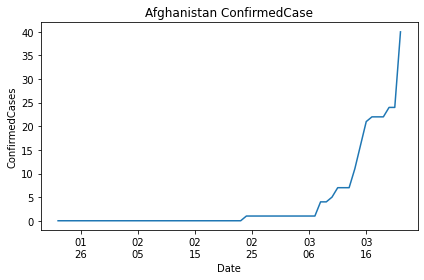

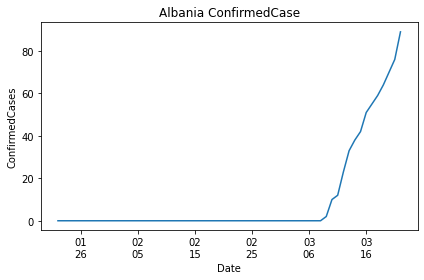

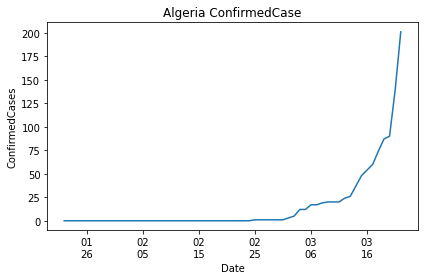

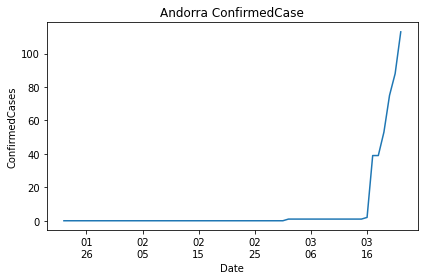

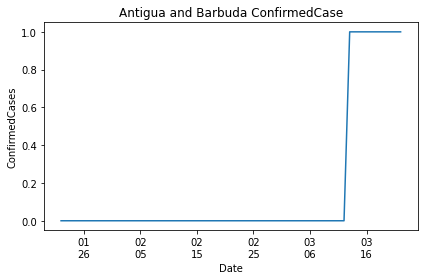

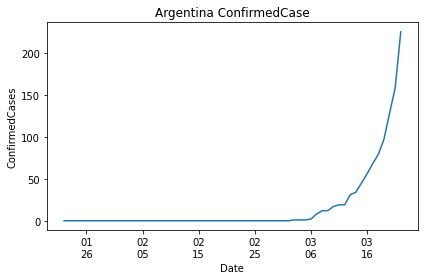

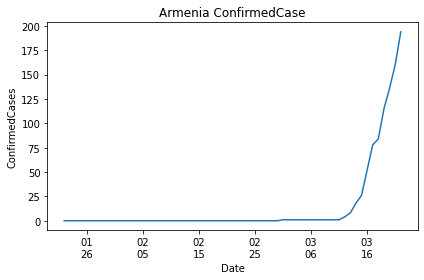

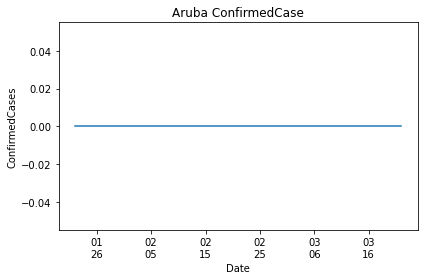

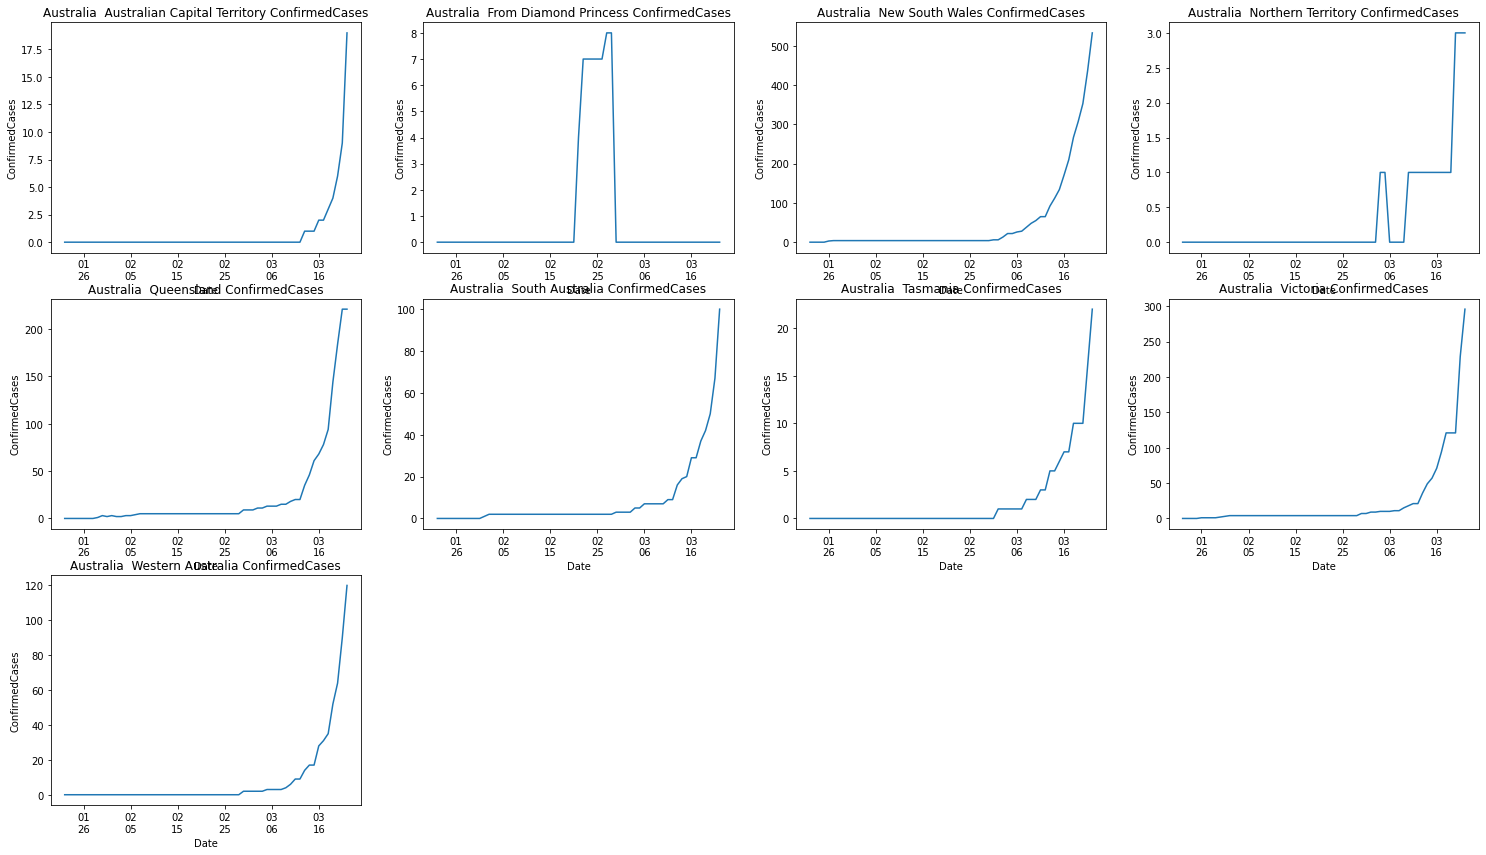

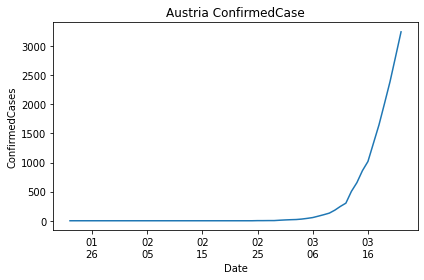

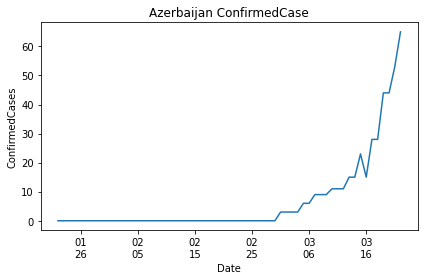

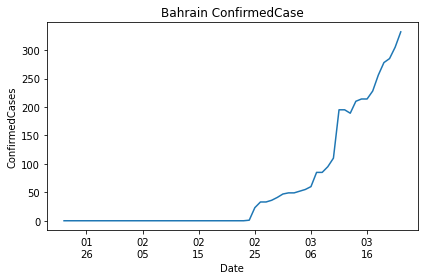

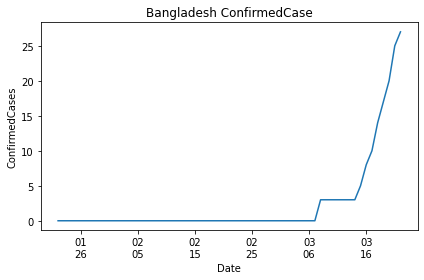

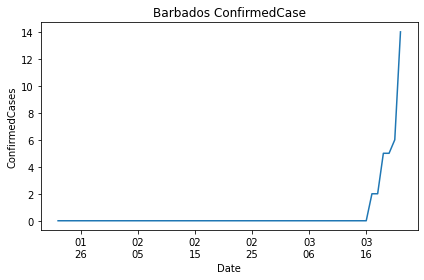

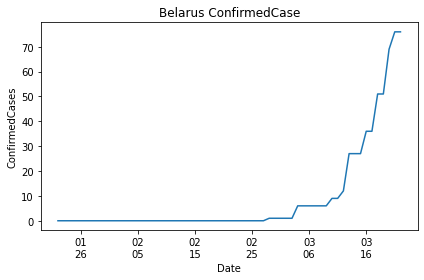

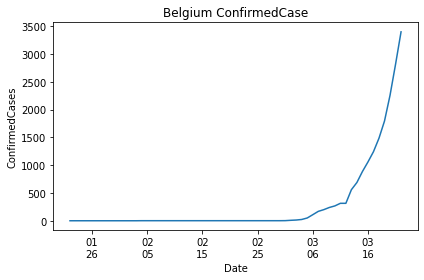

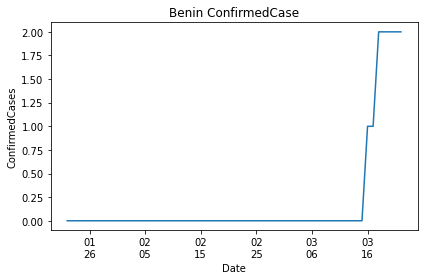

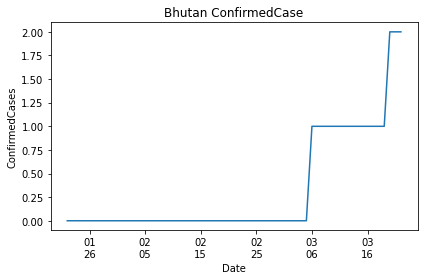

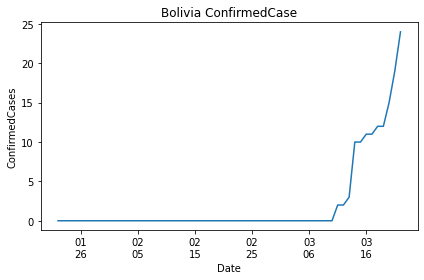

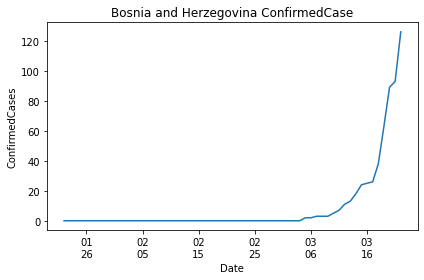

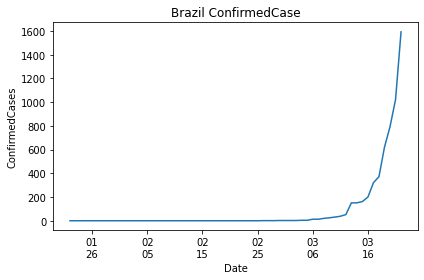

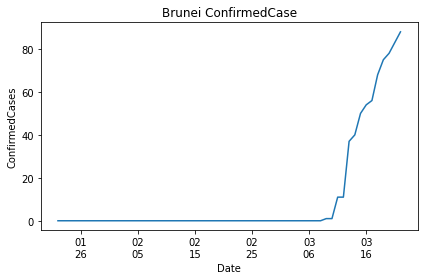

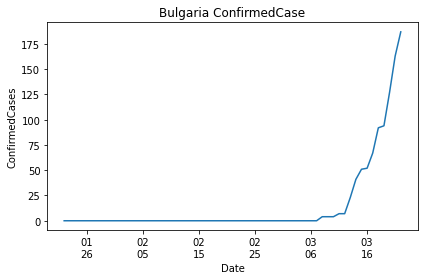

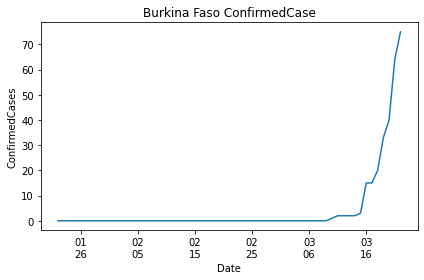

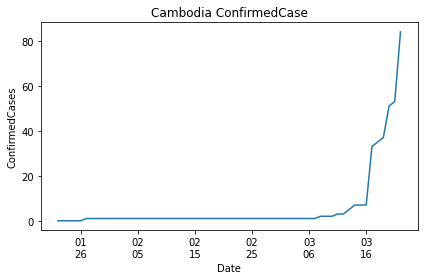

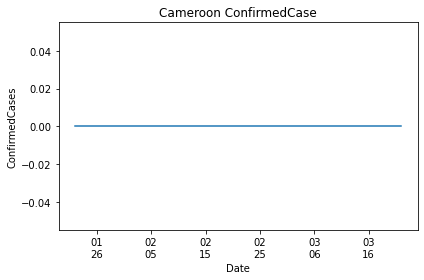

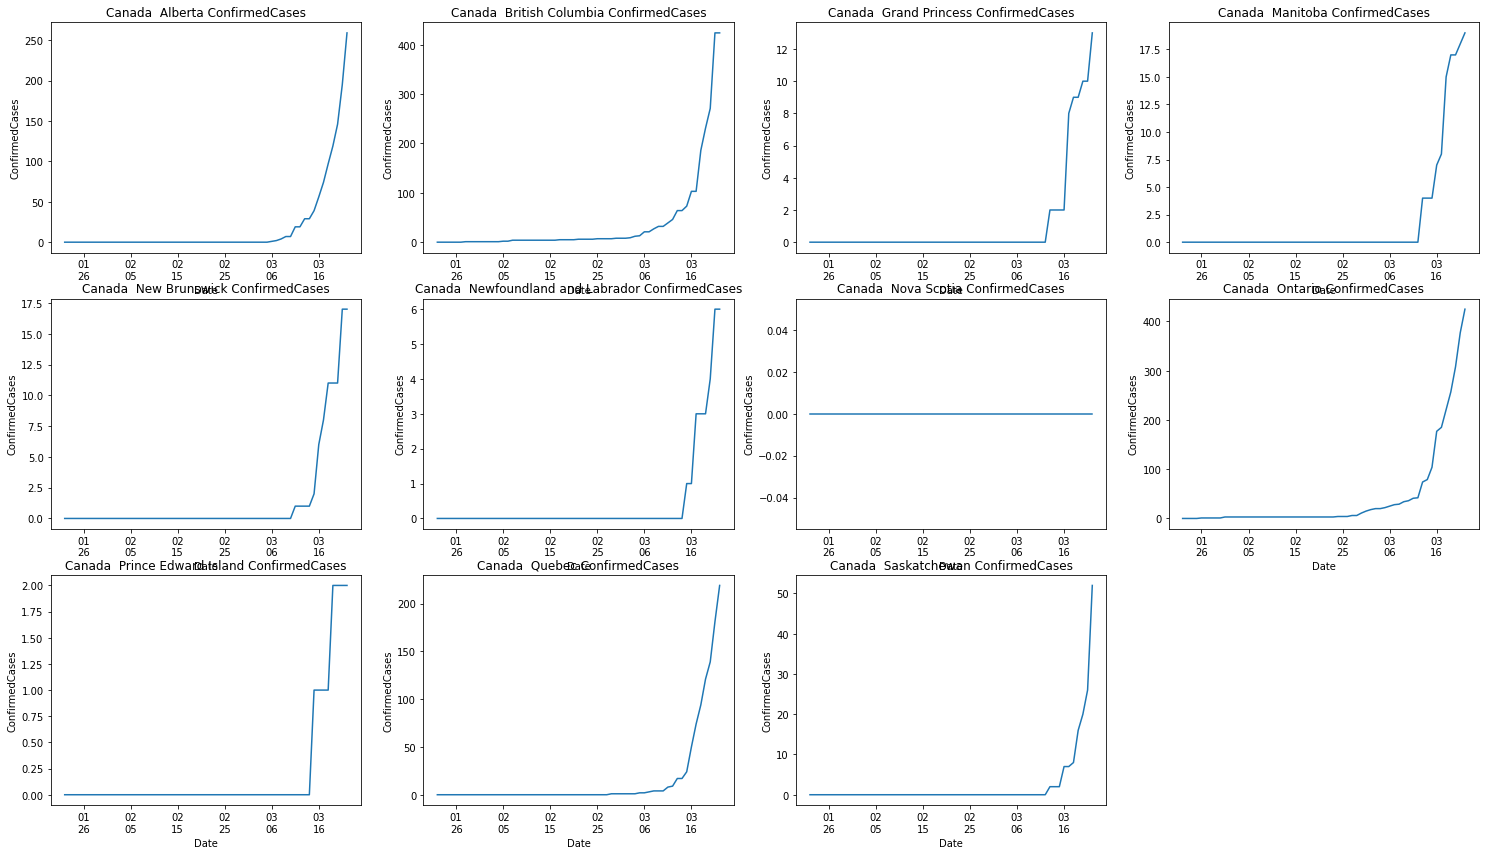

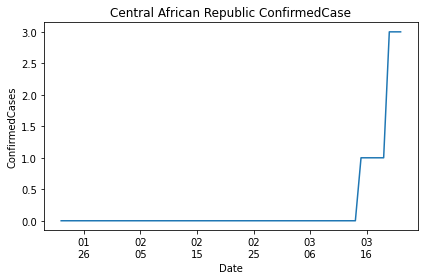

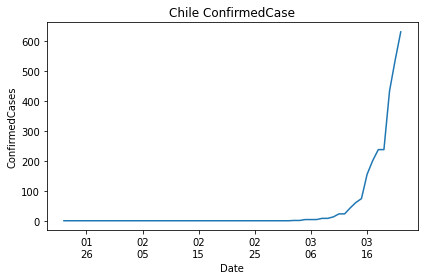

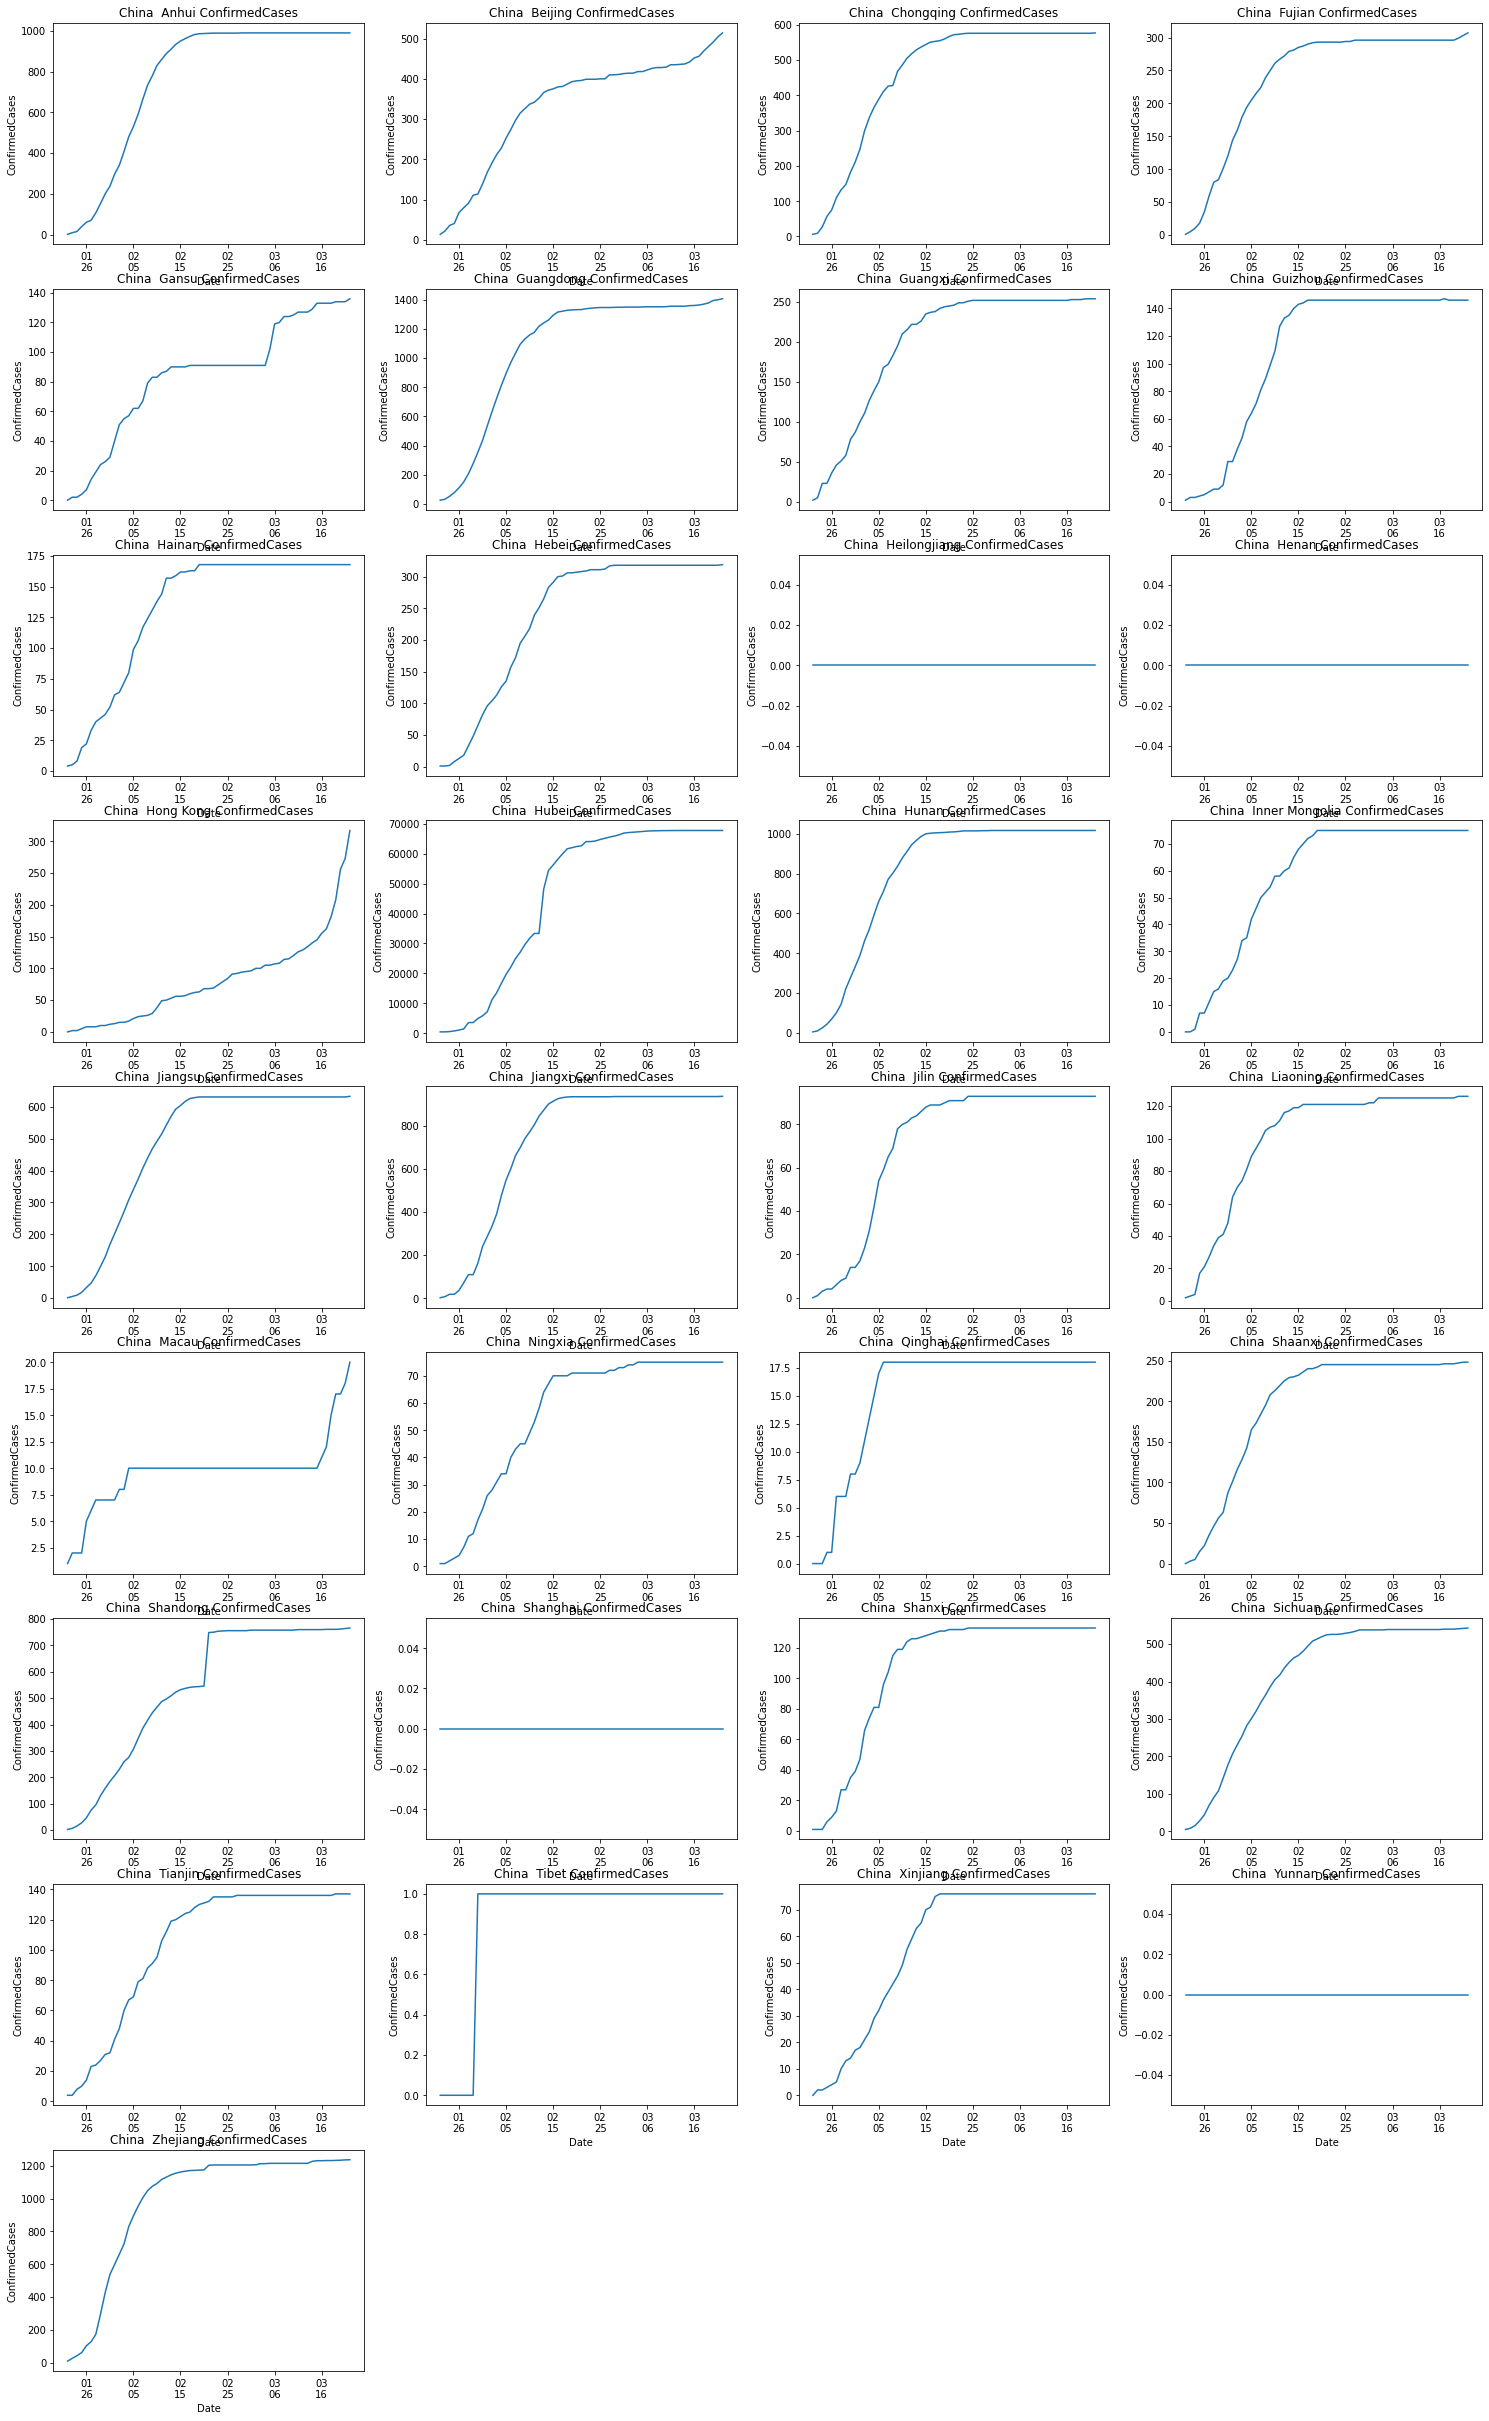

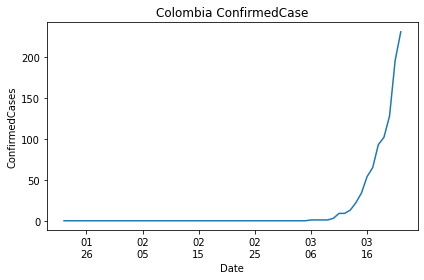

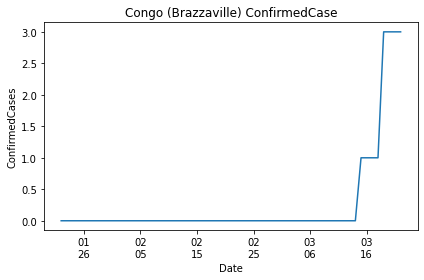

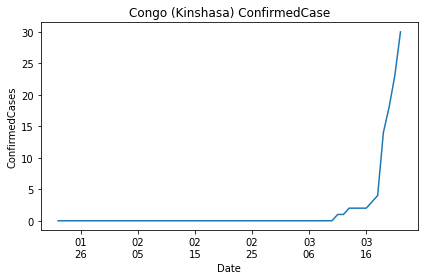

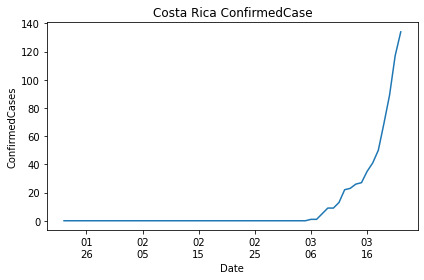

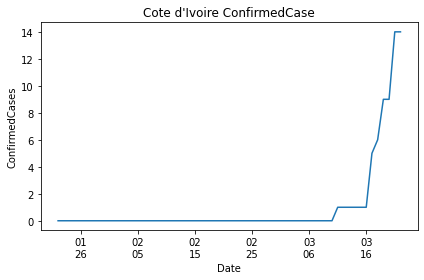

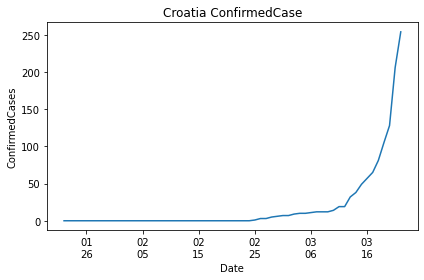

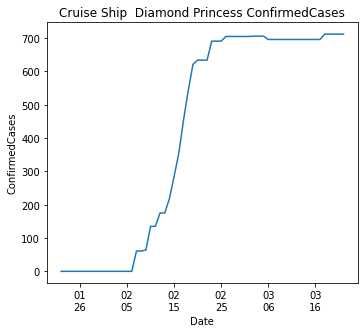

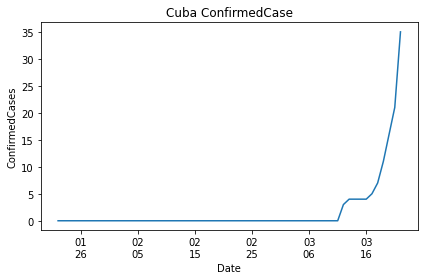

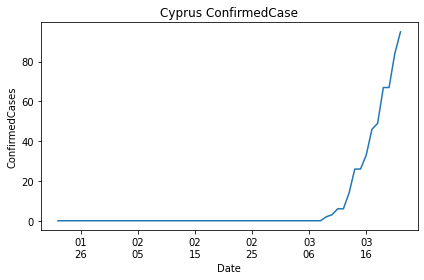

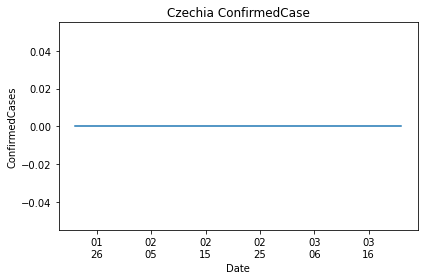

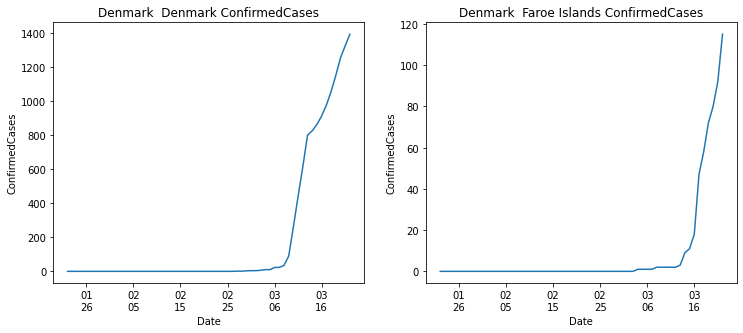

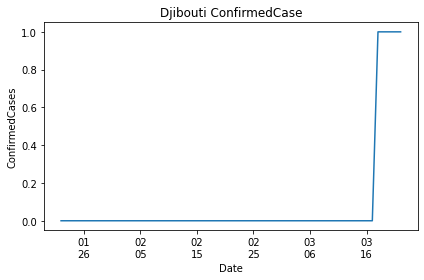

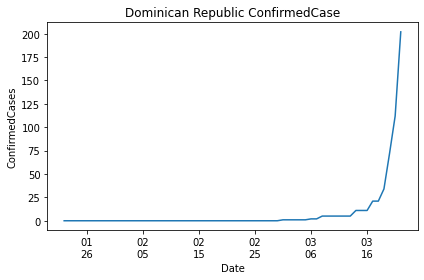

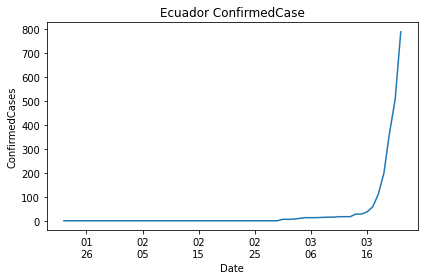

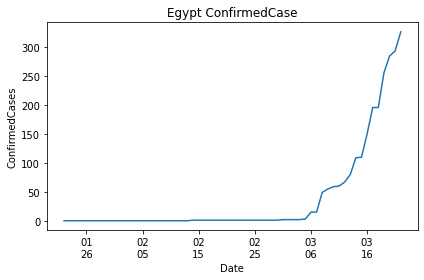

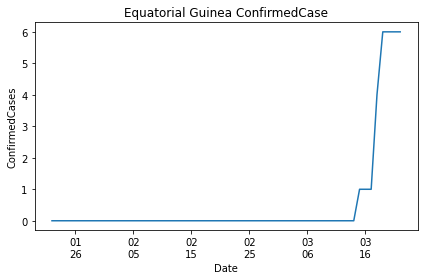

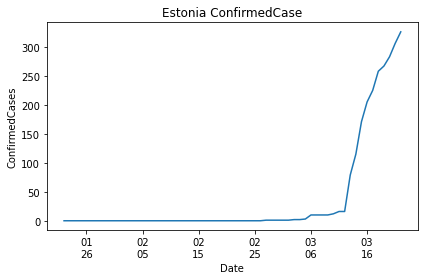

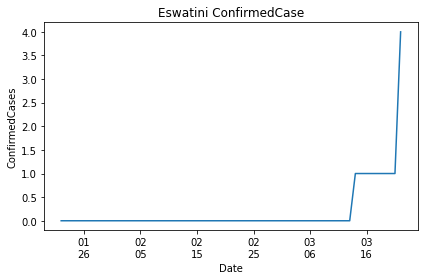

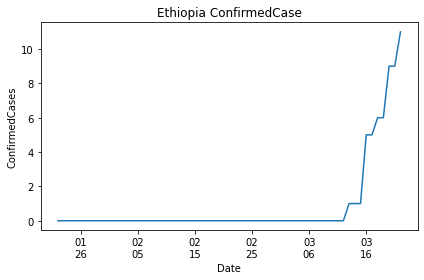

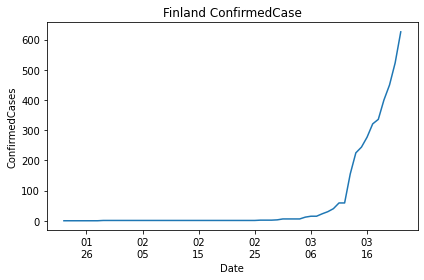

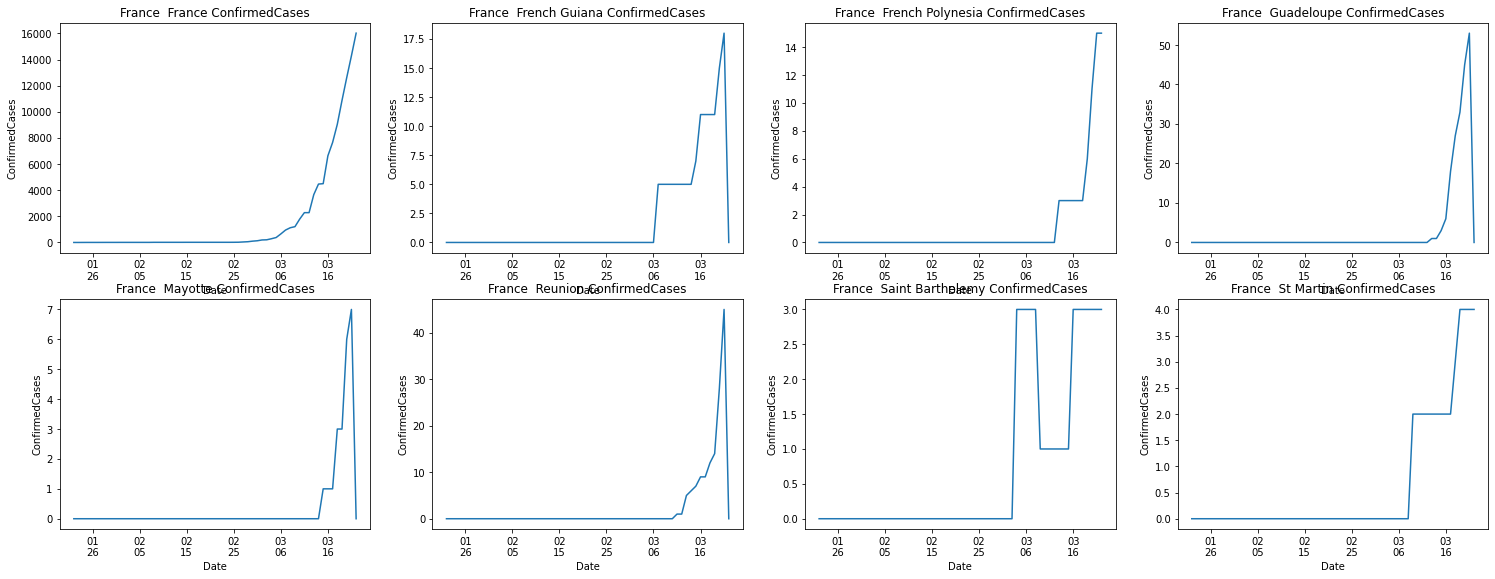

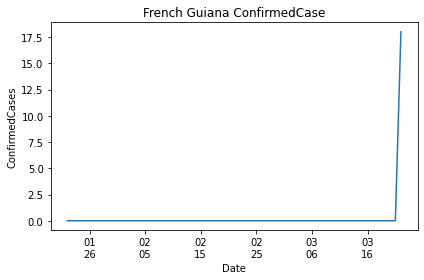

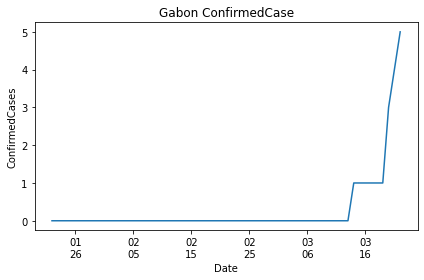

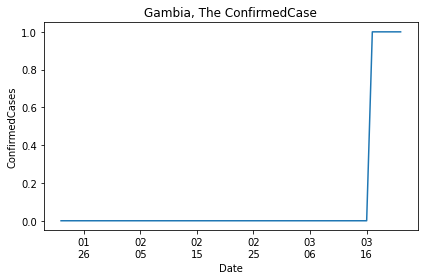

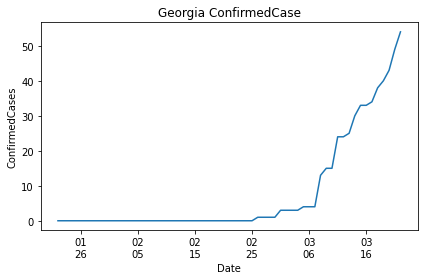

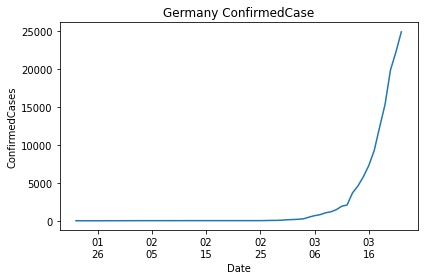

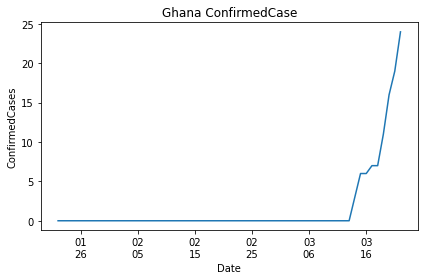

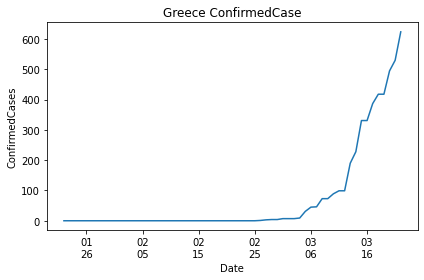

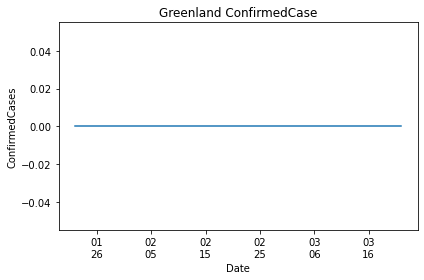

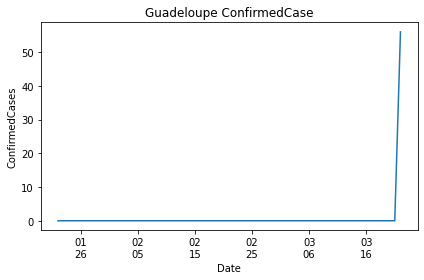

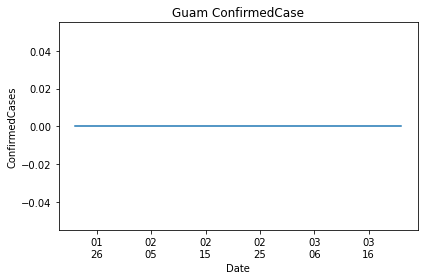

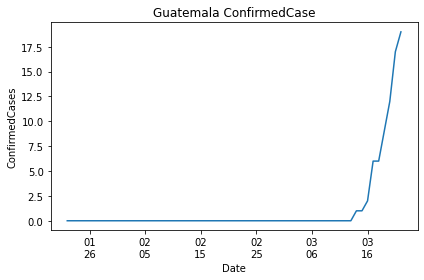

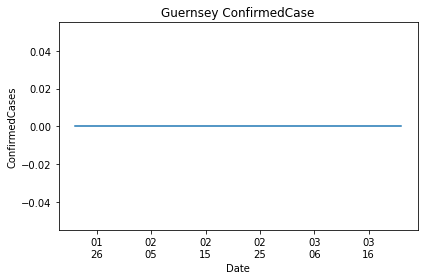

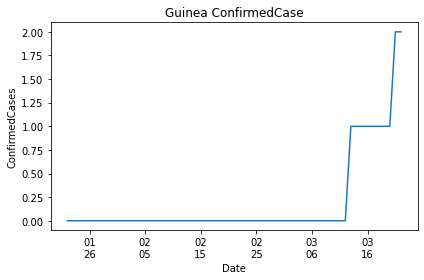

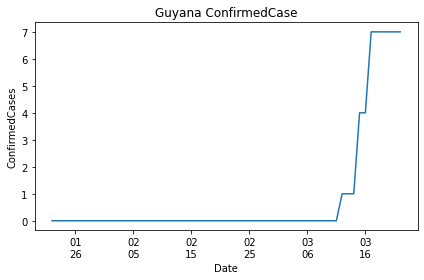

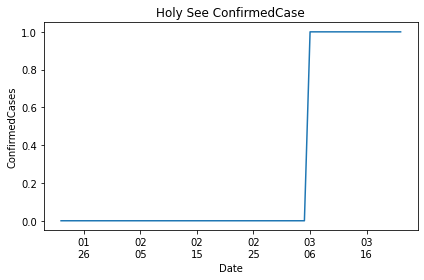

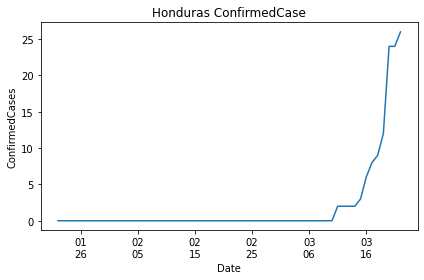

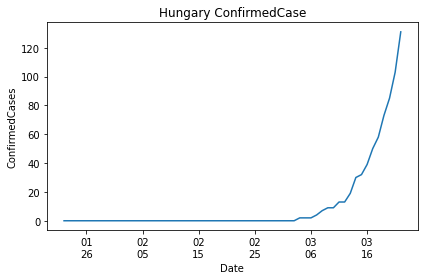

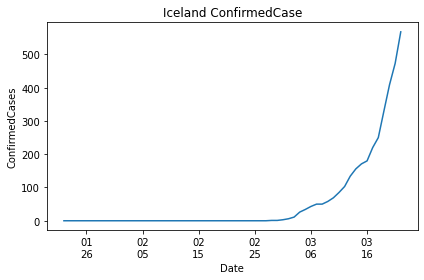

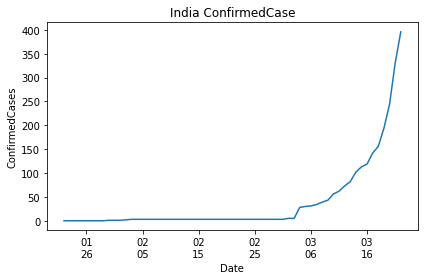

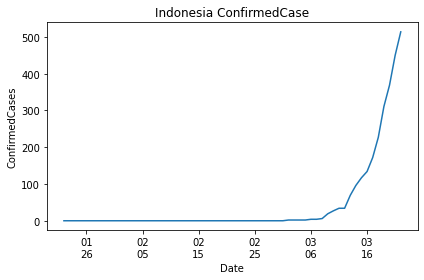

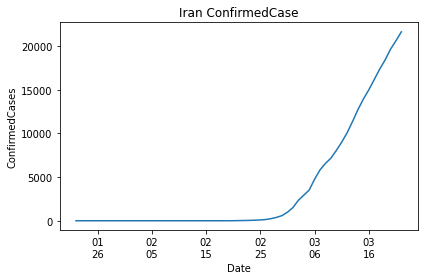

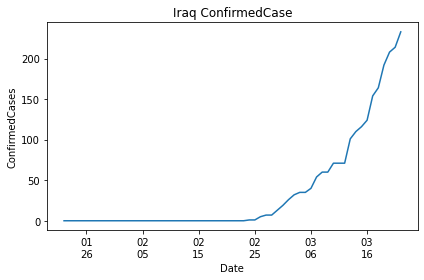

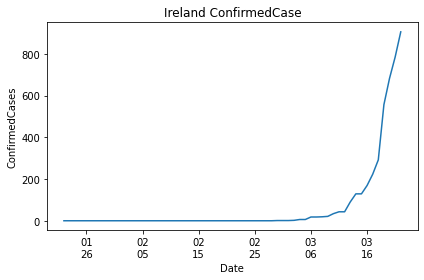

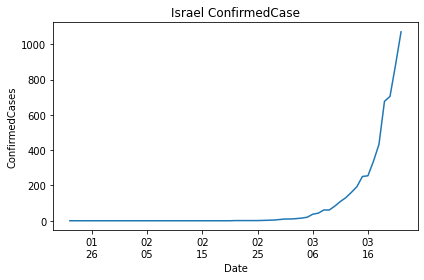

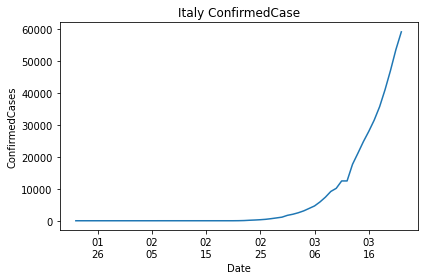

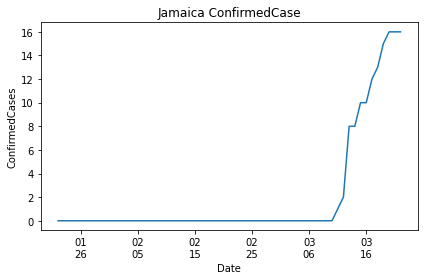

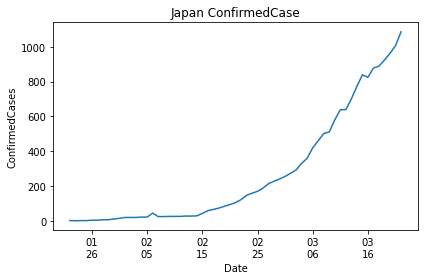

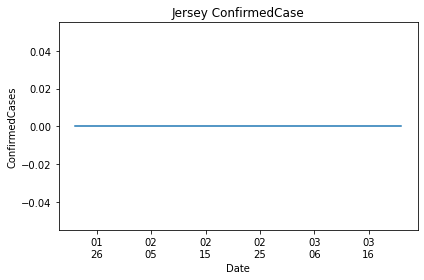

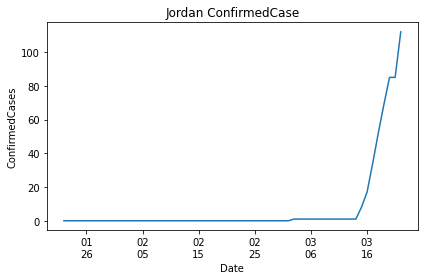

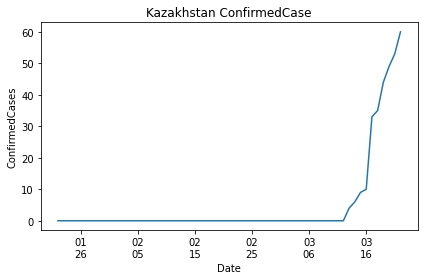

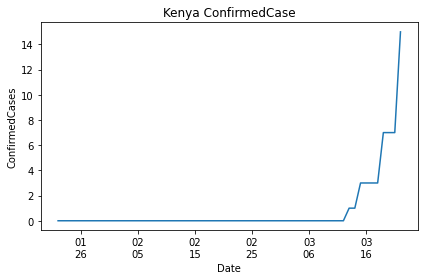

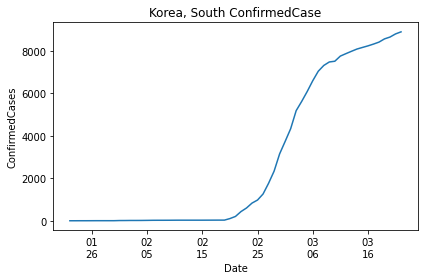

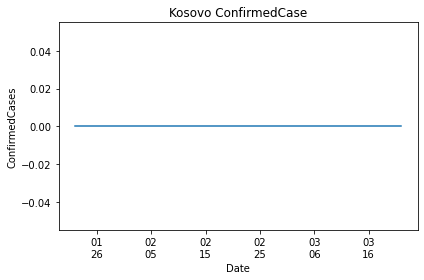

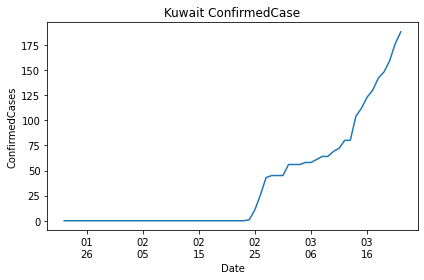

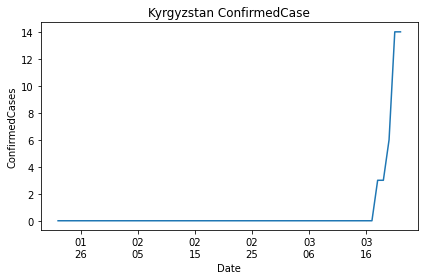

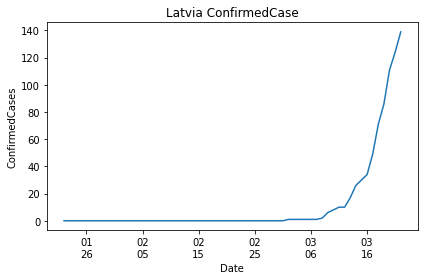

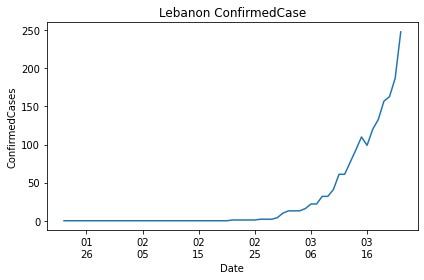

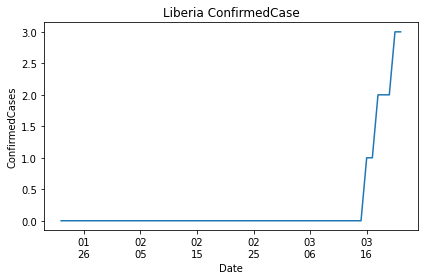

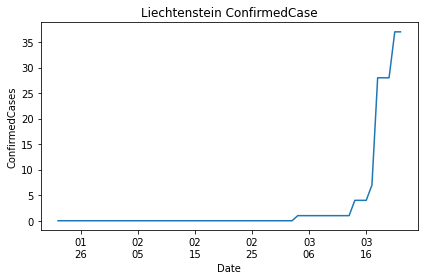

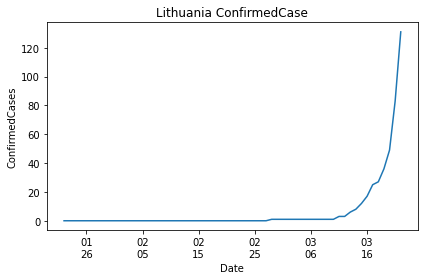

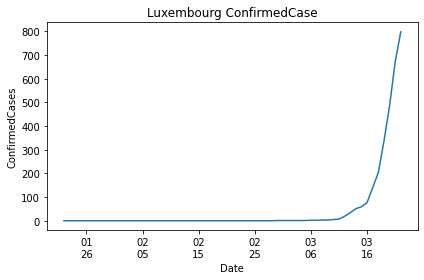

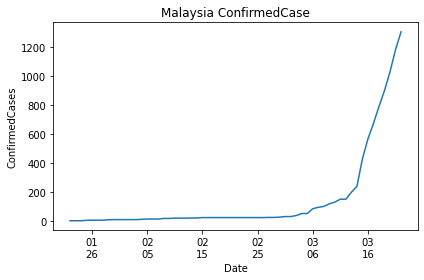

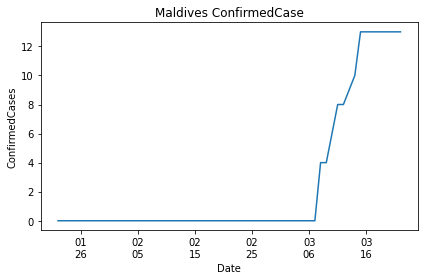

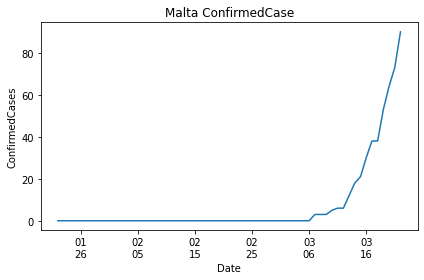

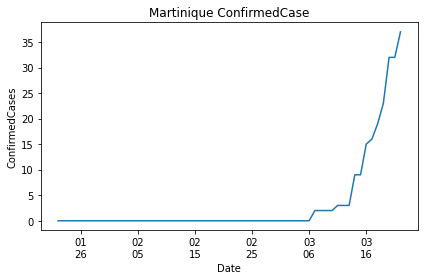

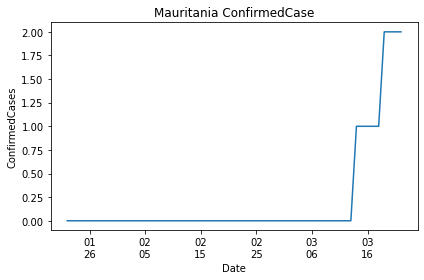

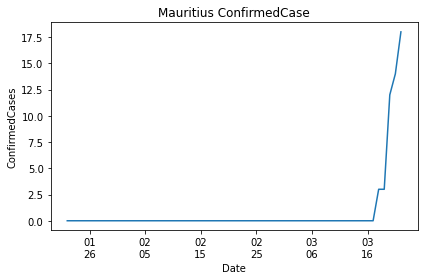

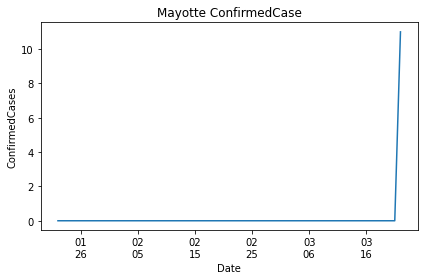

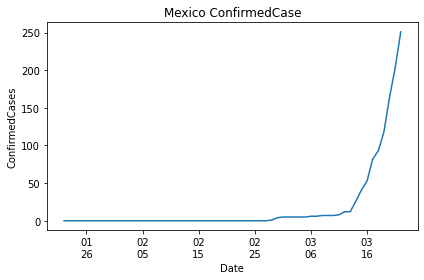

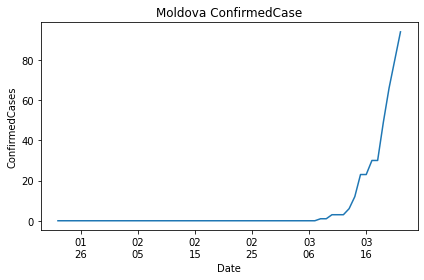

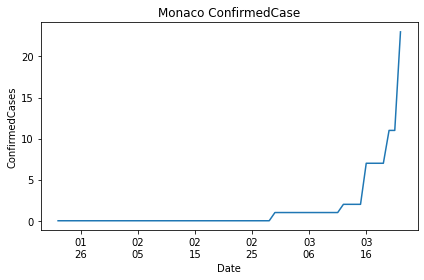

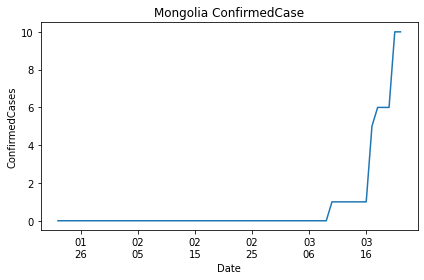

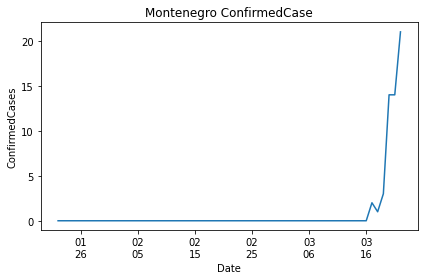

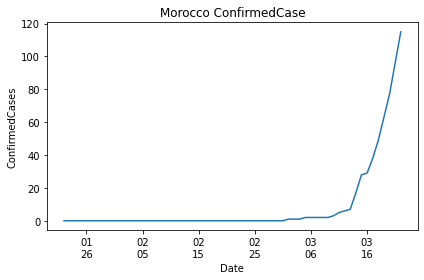

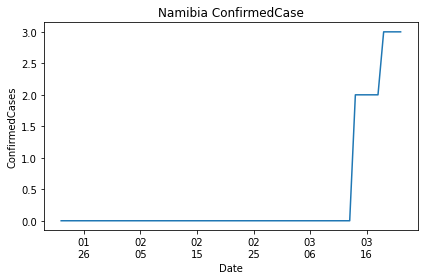

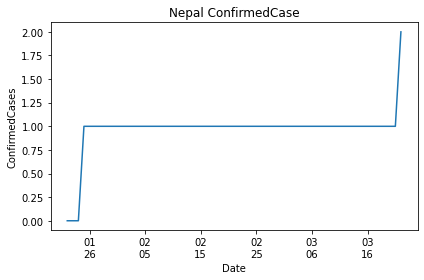

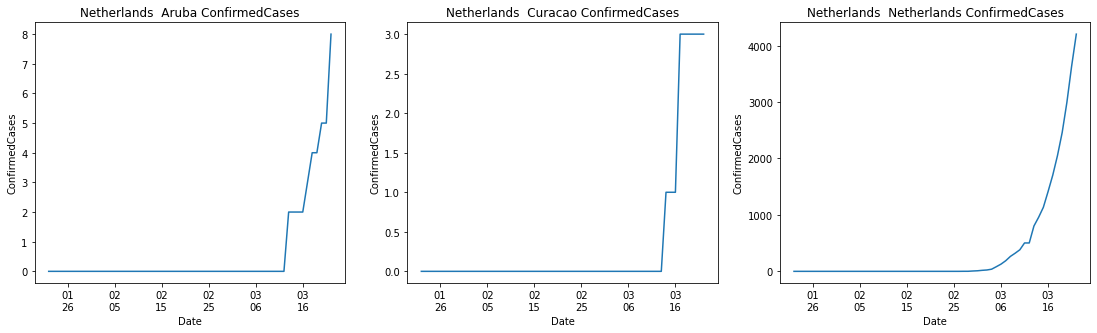

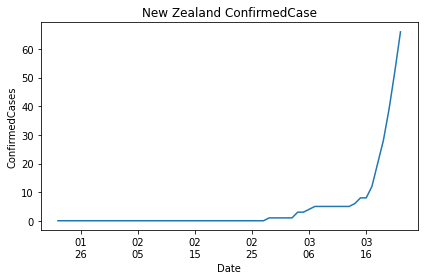

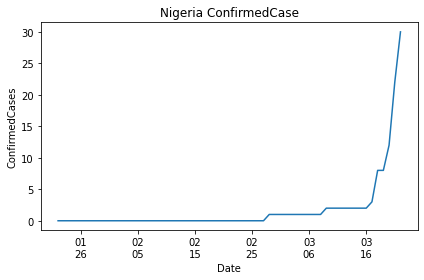

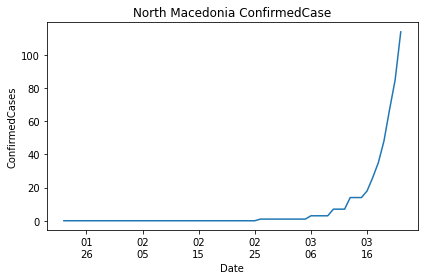

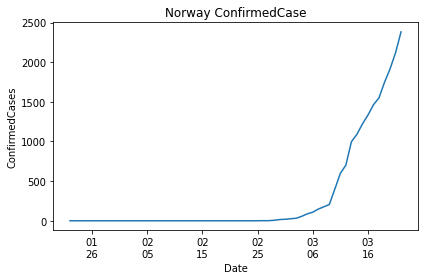

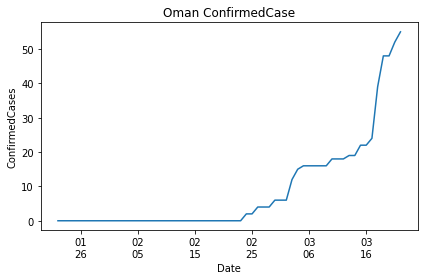

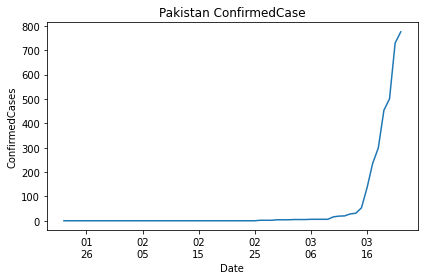

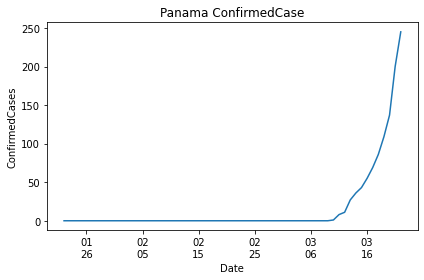

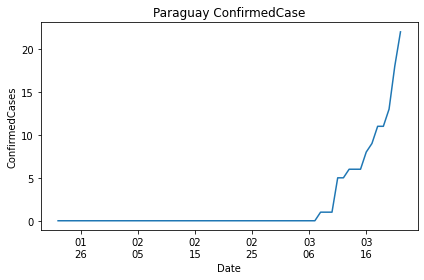

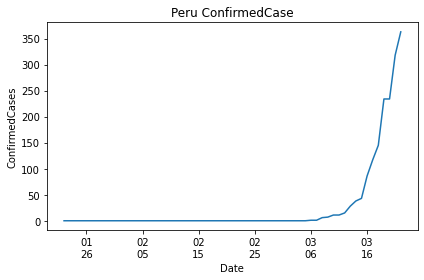

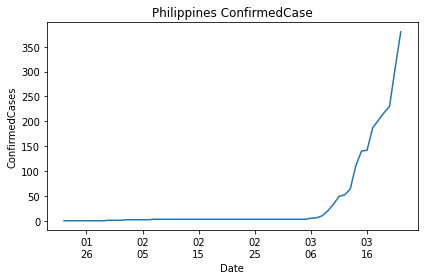

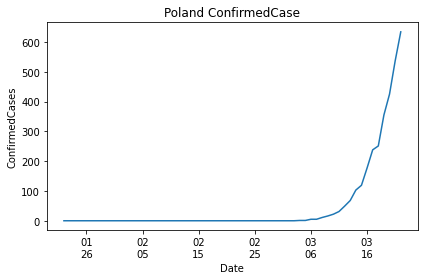

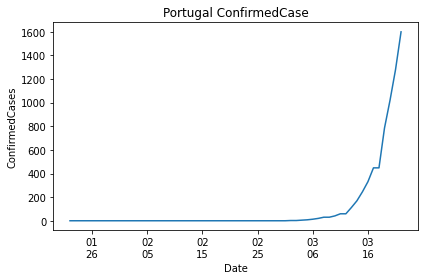

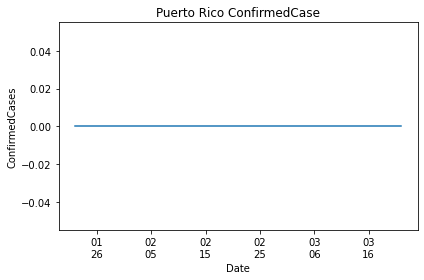

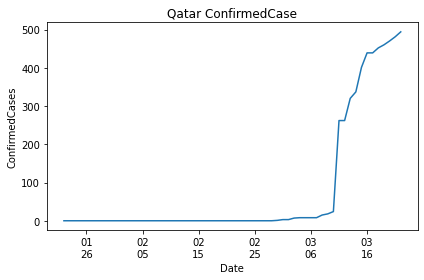

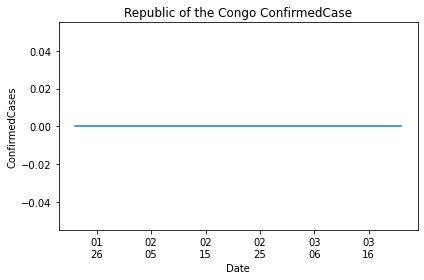

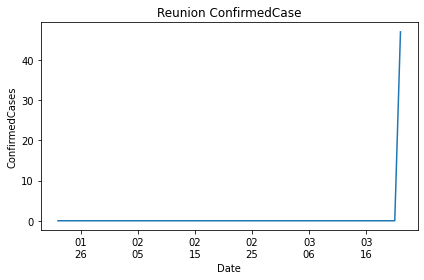

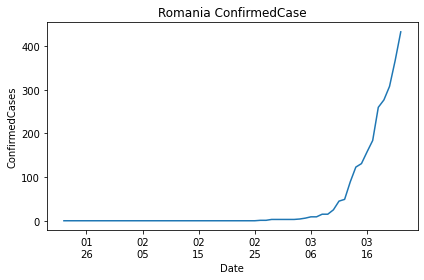

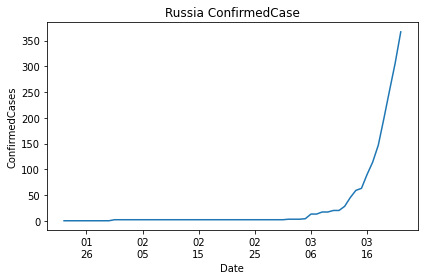

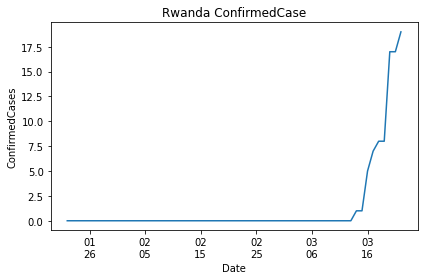

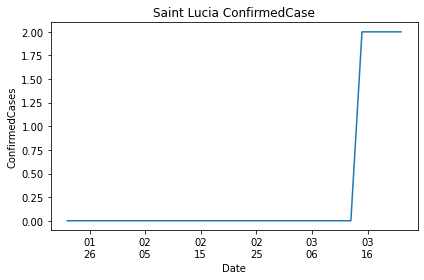

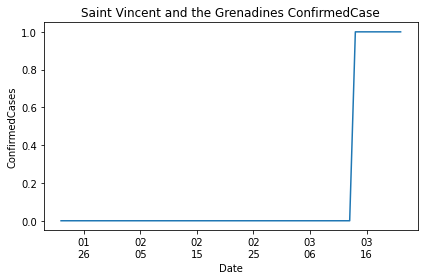

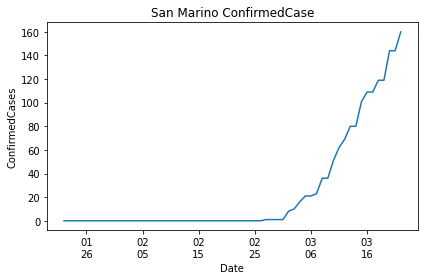

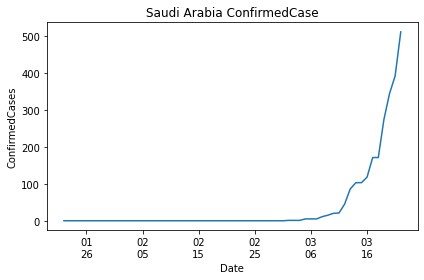

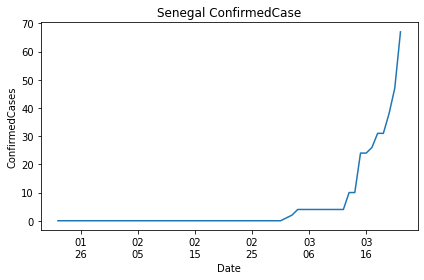

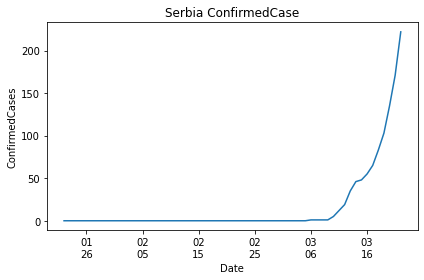

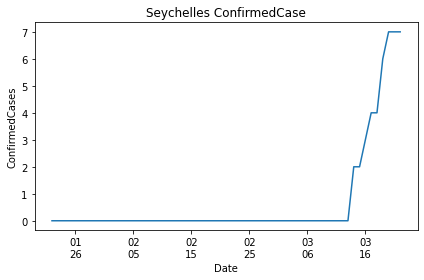

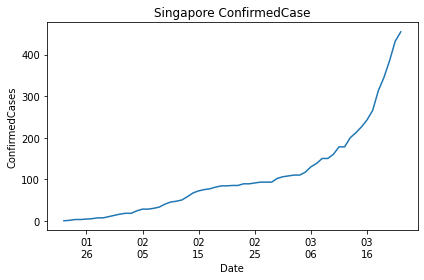

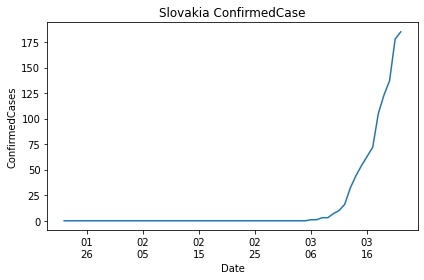

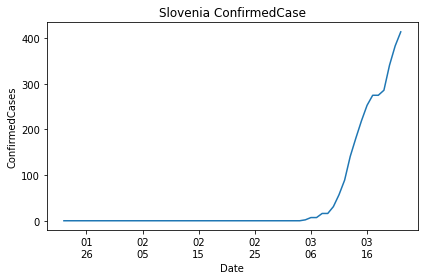

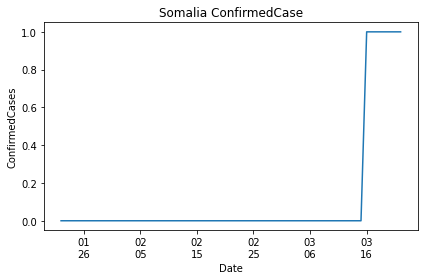

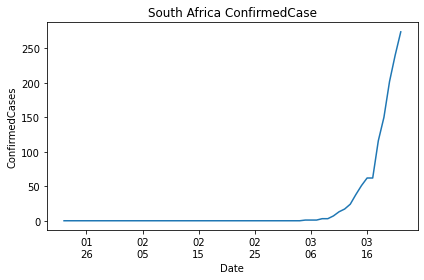

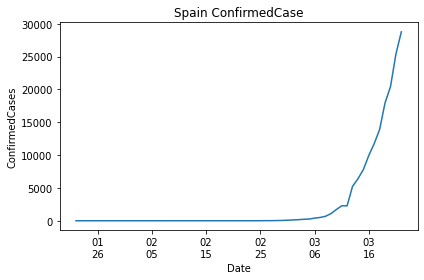

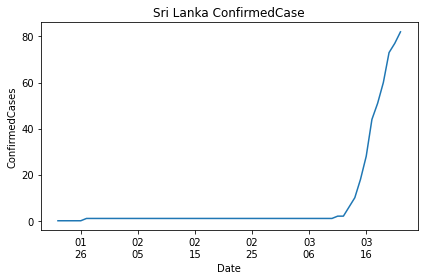

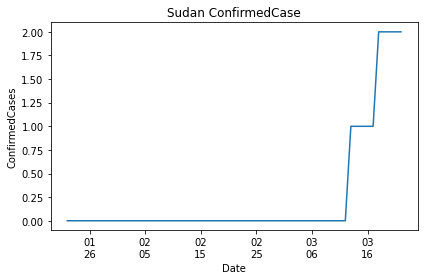

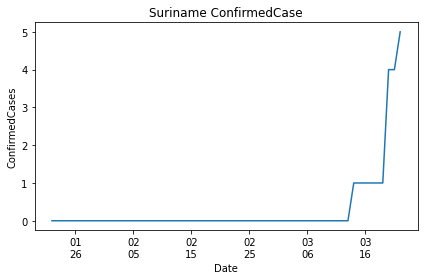

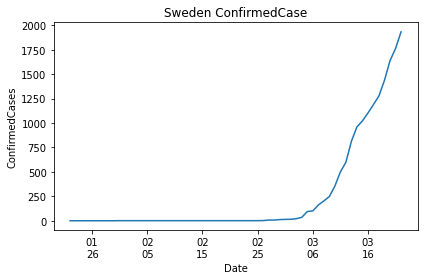

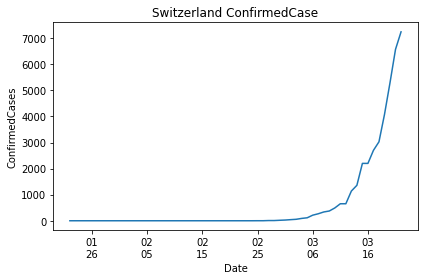

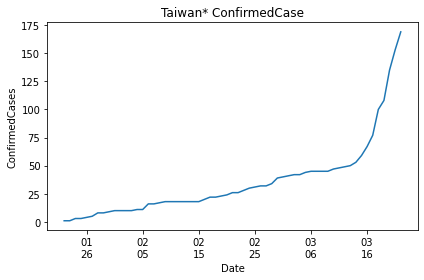

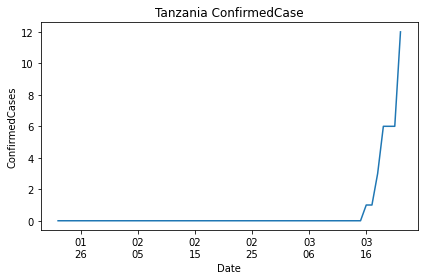

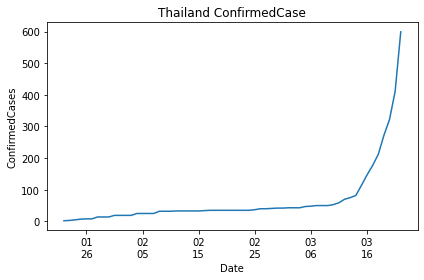

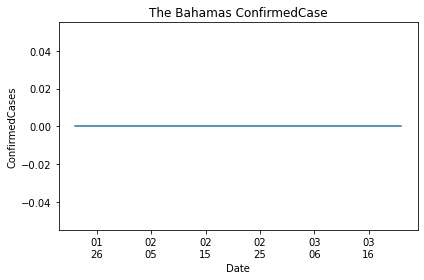

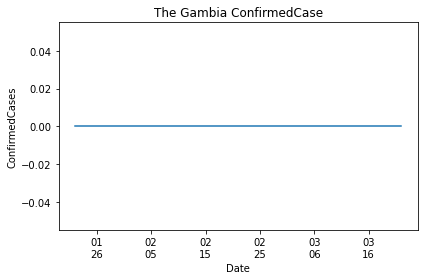

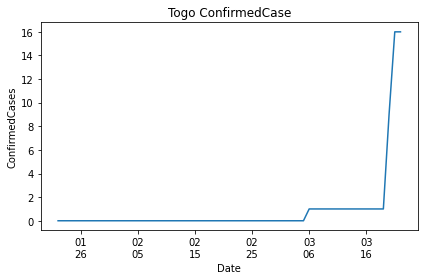

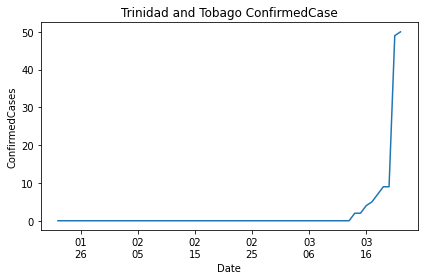

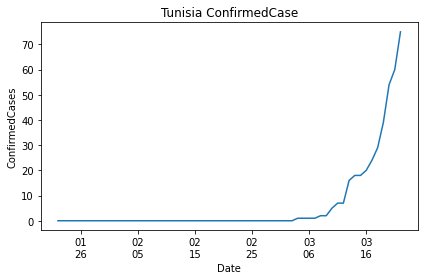

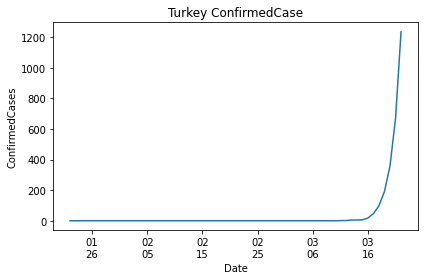

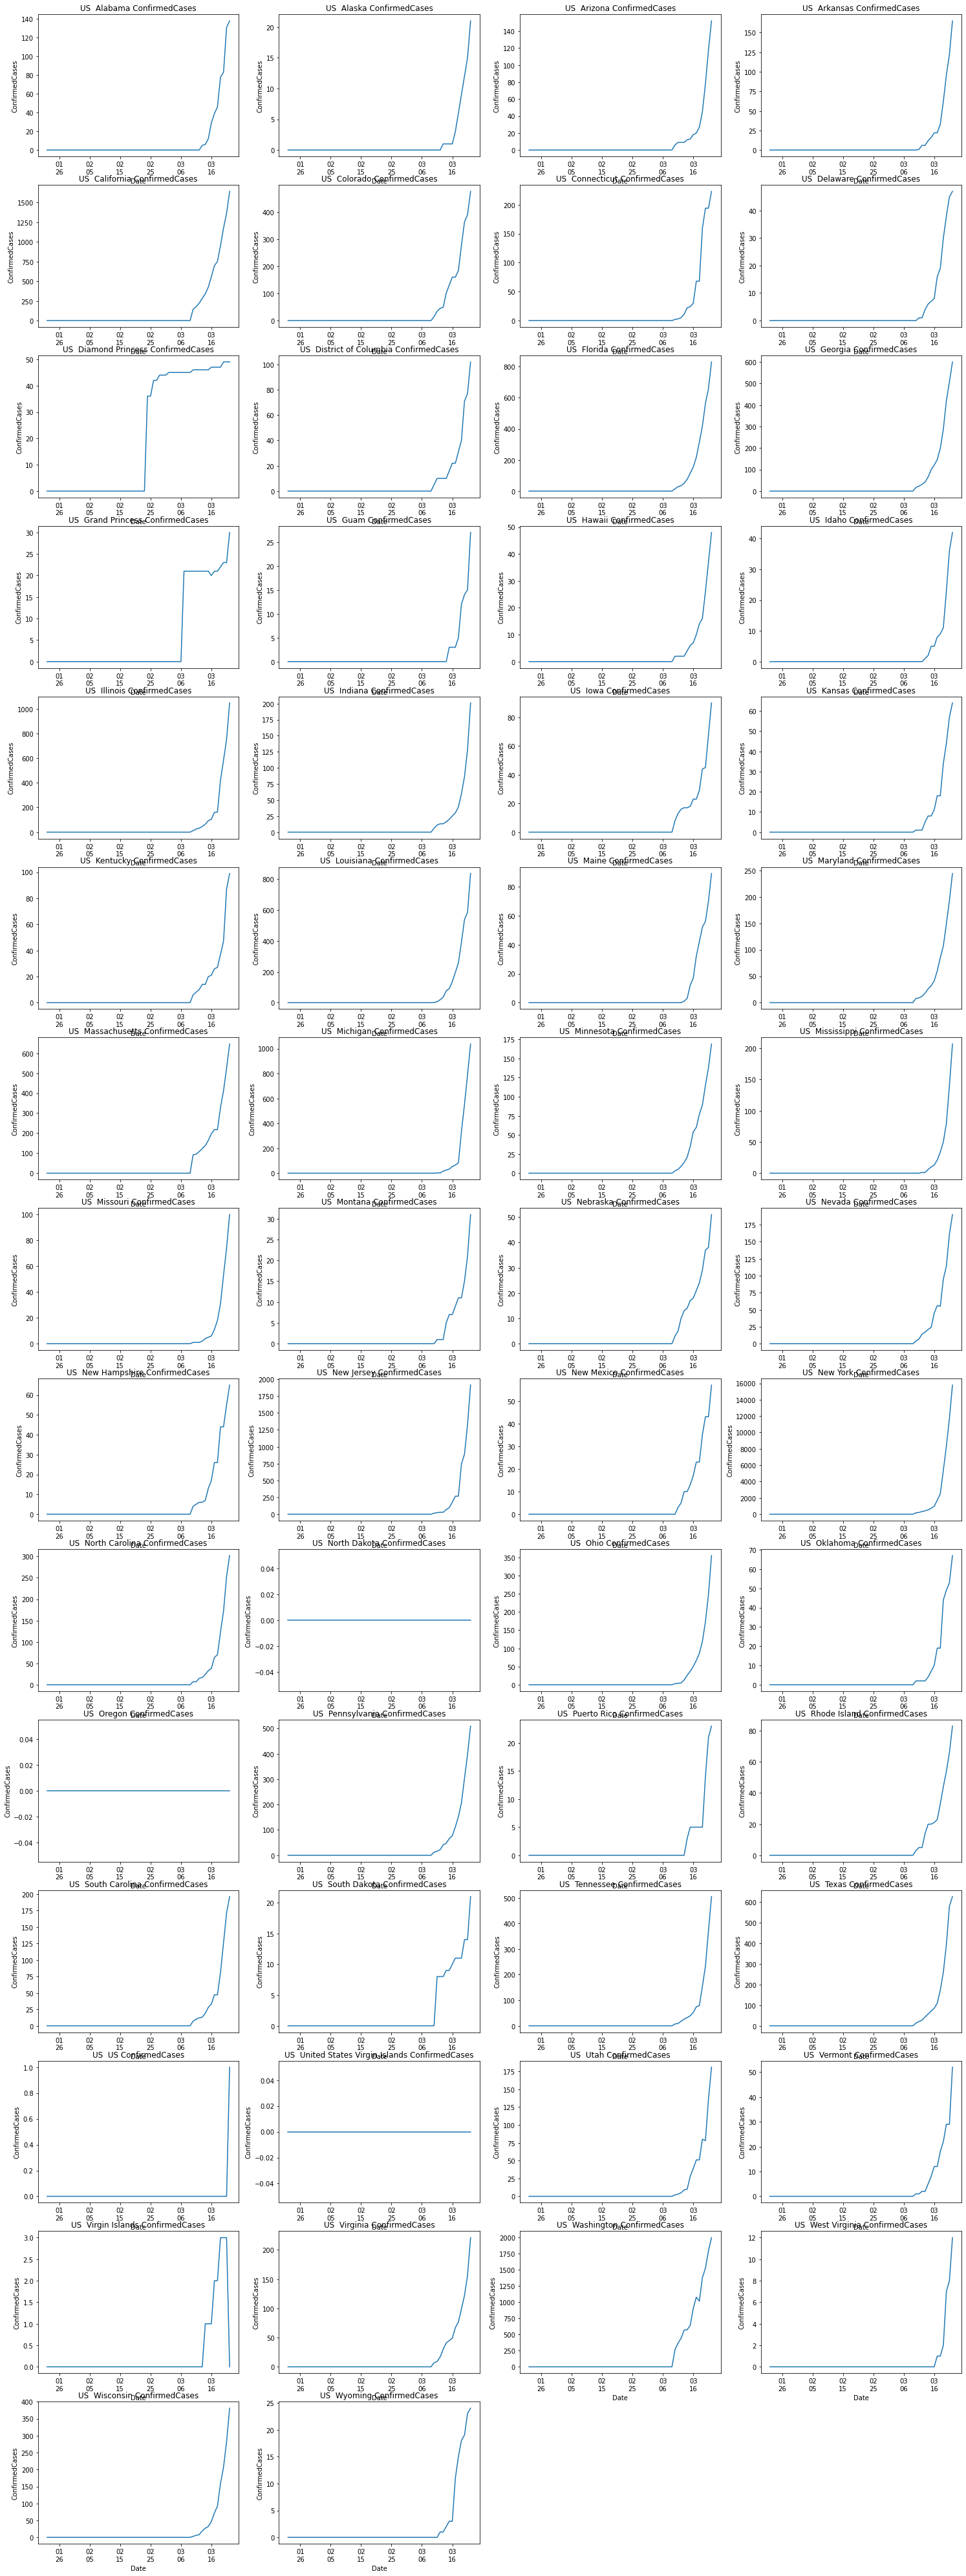

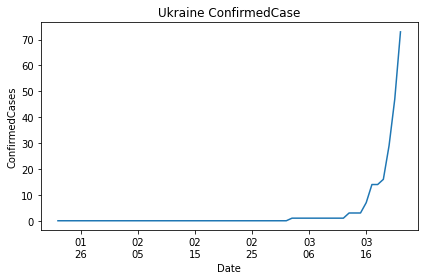

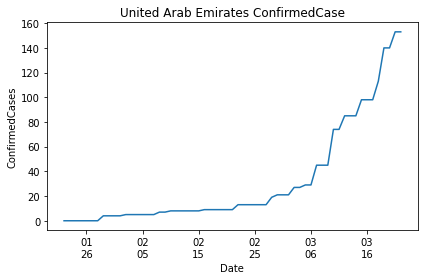

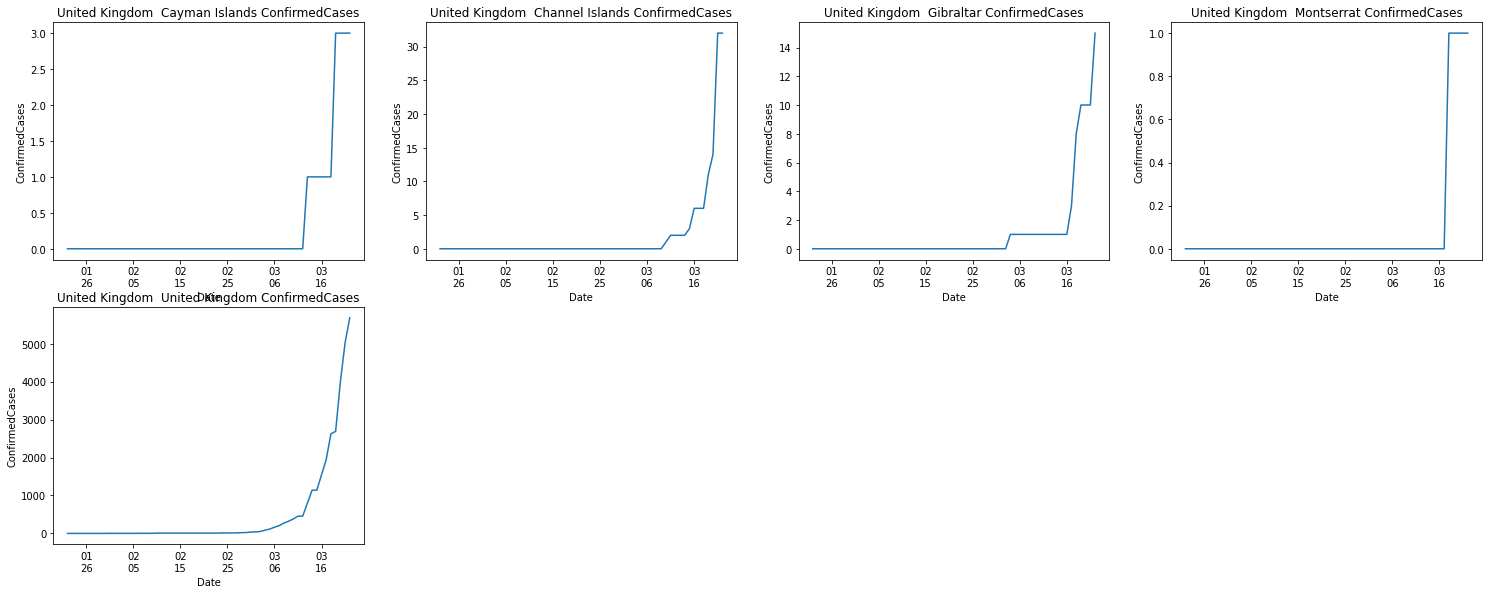

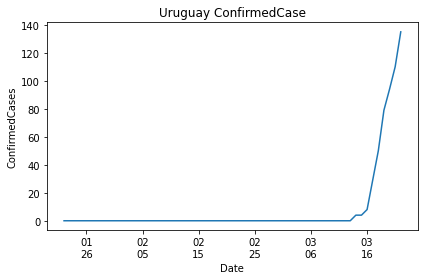

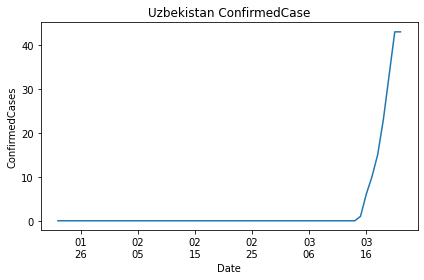

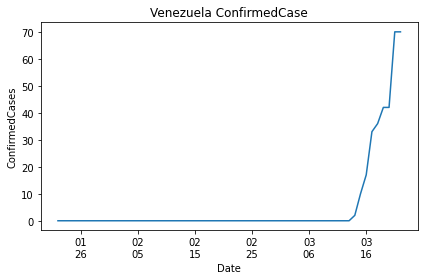

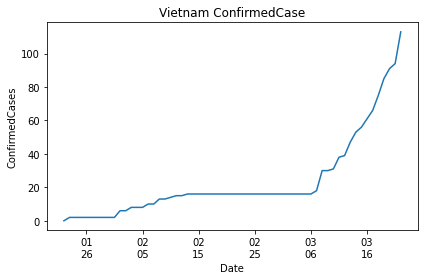

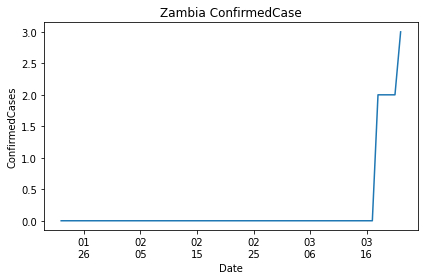

In [10]:
for country in train['Country/Region'].unique():
    country_pd_train = train[train['Country/Region']==country]
    if country_pd_train['Province/State'].isna().unique()==True:
        plt_title = country+' ConfirmedCase'
        plot_trend_by_date(country_pd_train,value = 'ConfirmedCases',title = plt_title)
    else:
        state_count = len(country_pd_train['Province/State'].unique())
        row = state_count//4+1
        column = 4
        fig =plt.figure(figsize = (4*6.4,row*4.8))
        index = 1
        for state in country_pd_train['Province/State'].unique():
            state_pd = country_pd_train[country_pd_train['Province/State']==state]
            plt_title = country+'  '+state+' ConfirmedCases'
            ax = fig.add_subplot(row,column,index)
            xaxis = state_pd['Date_datetime'].tolist()
            yaxis = state_pd['ConfirmedCases']
            xaxis = dates.date2num(xaxis)
            hfmt = dates.DateFormatter('%m\n%d')
            ax.xaxis.set_major_formatter(hfmt)

            plt.xlabel('Date')
            plt.ylabel('ConfirmedCases')
            plt.title(plt_title)
            ax.plot(xaxis, yaxis)
            index += 1
        plt.show() 
            #plot_trend_by_date(state_pd,value = 'ConfirmedCases',title = plt_title)

### Plot Fatalities Trends

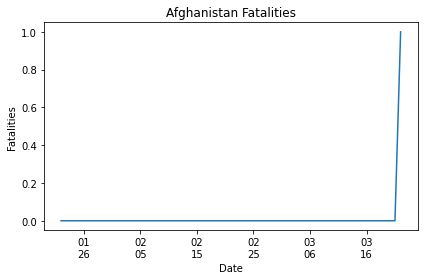

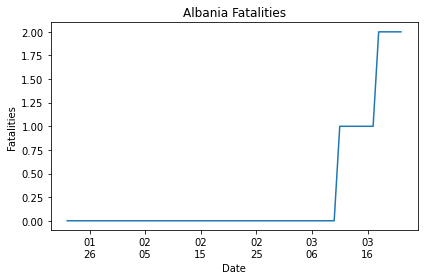

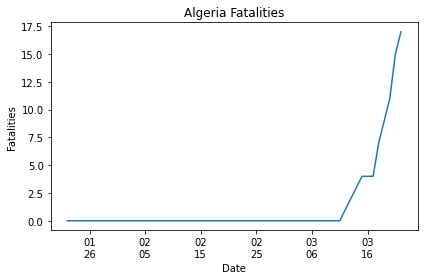

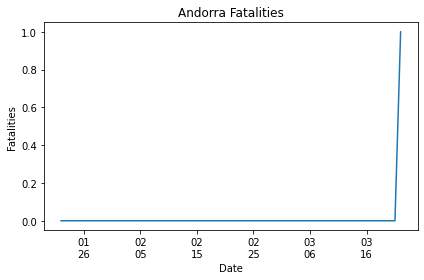

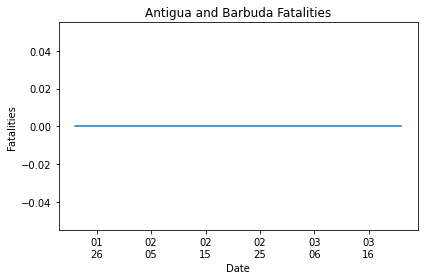

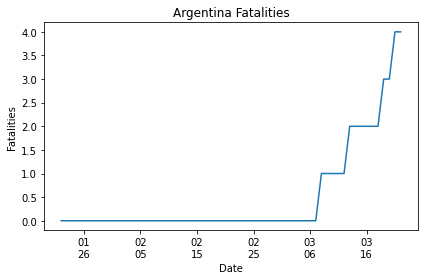

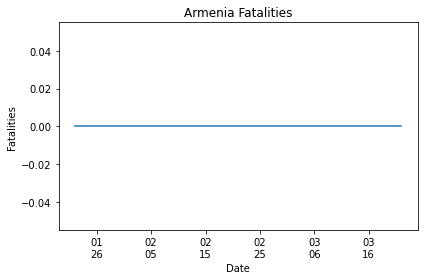

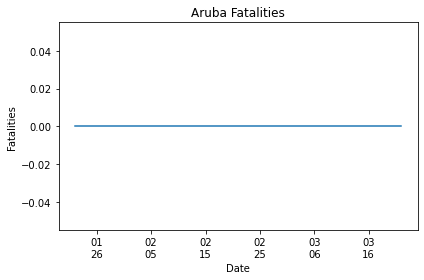

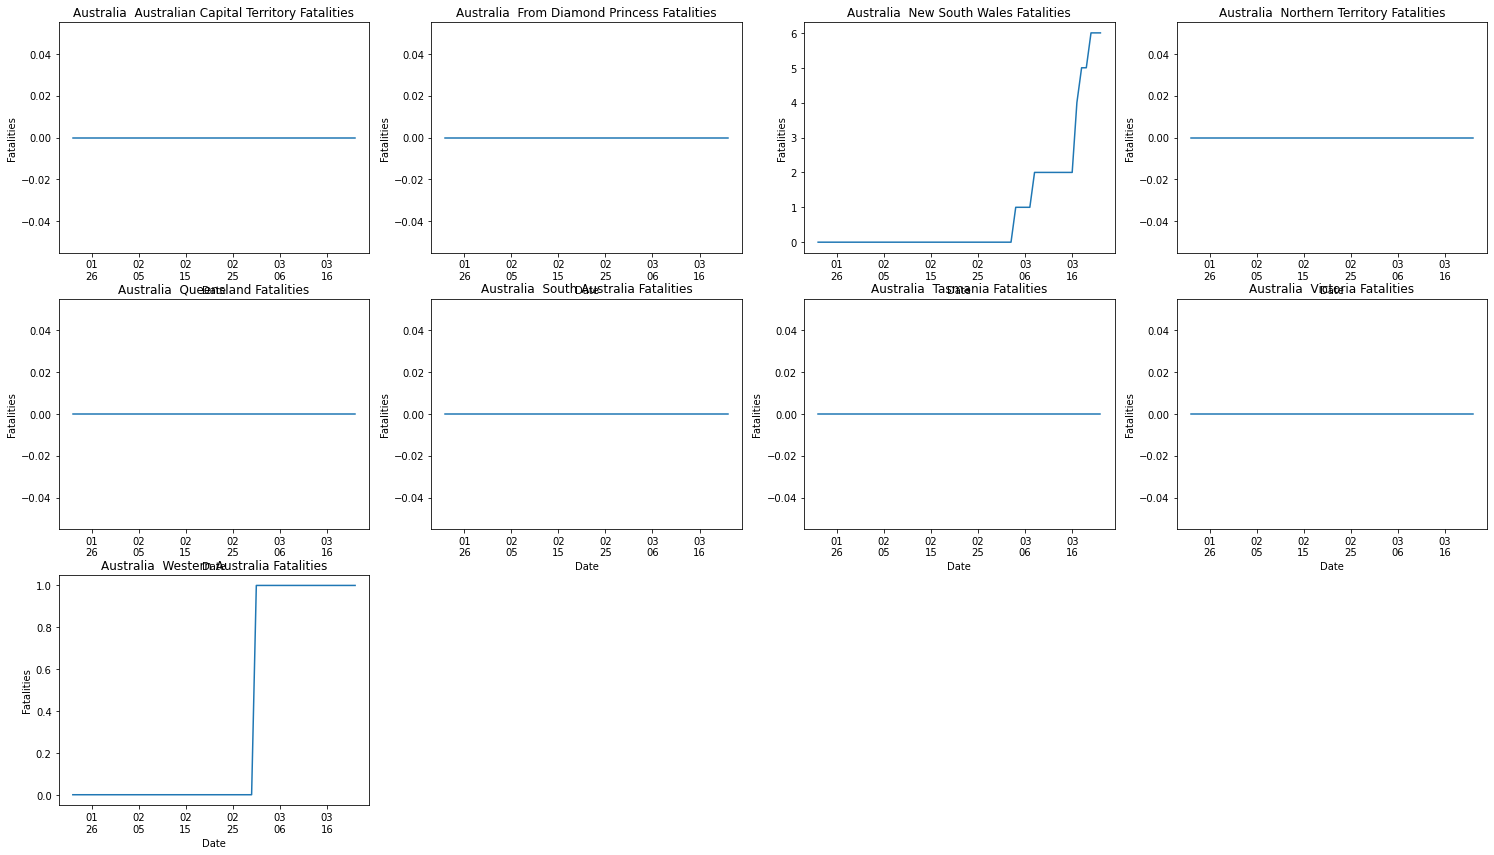

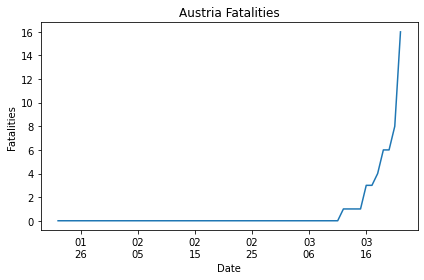

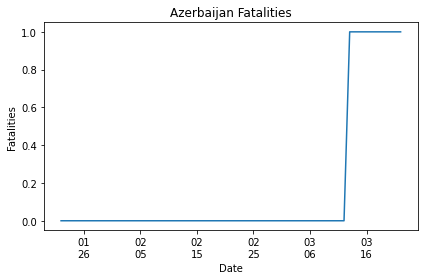

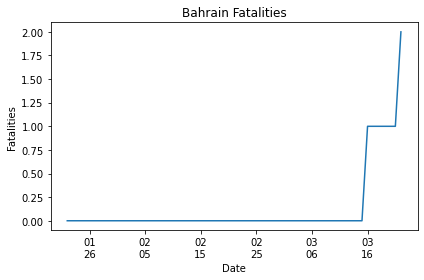

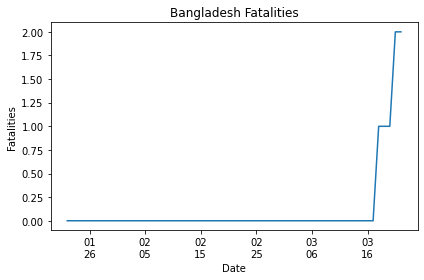

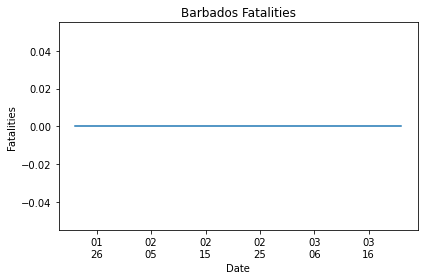

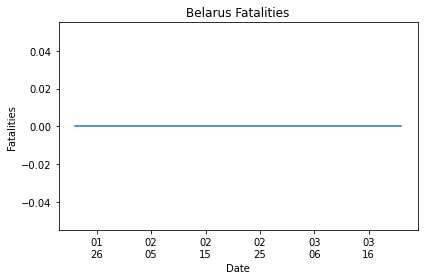

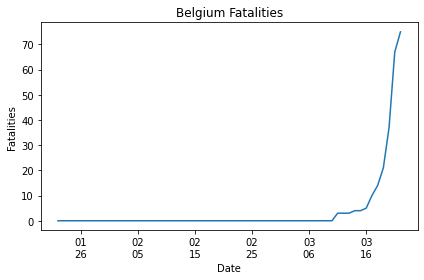

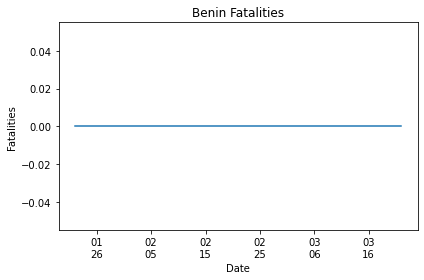

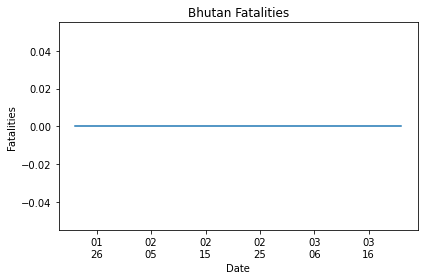

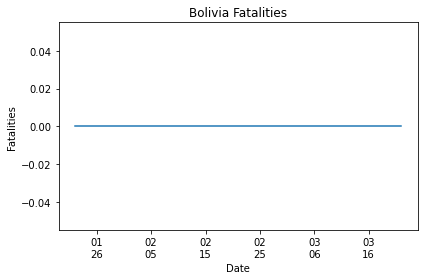

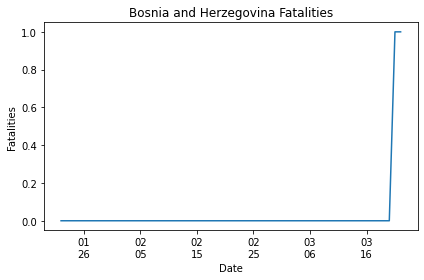

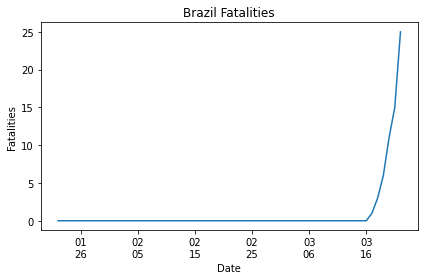

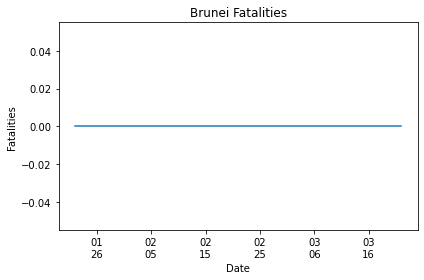

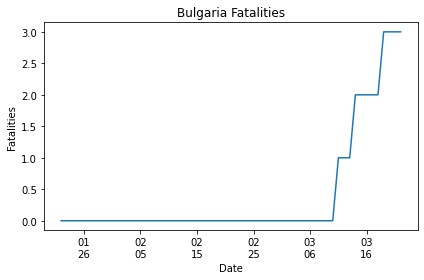

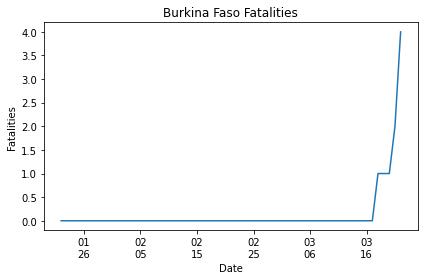

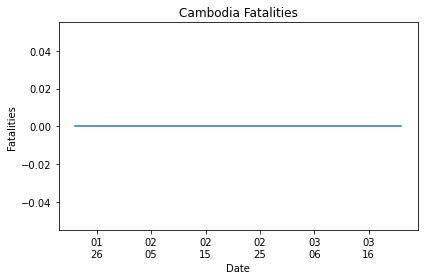

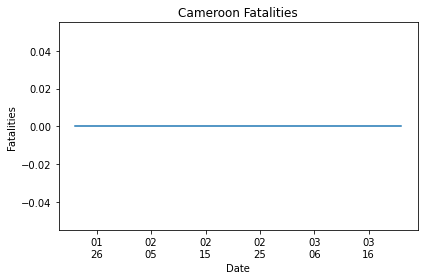

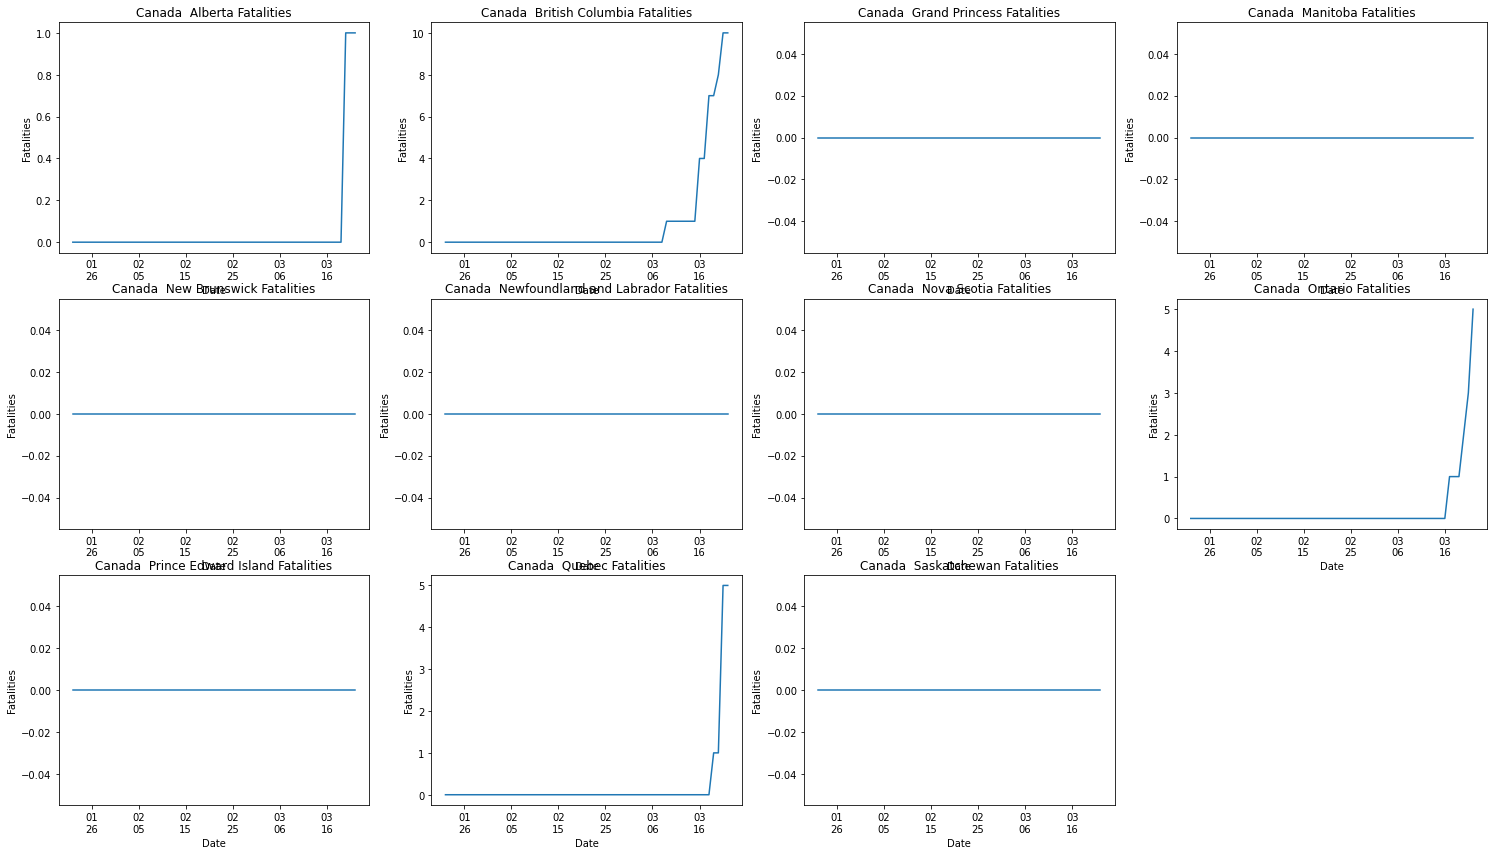

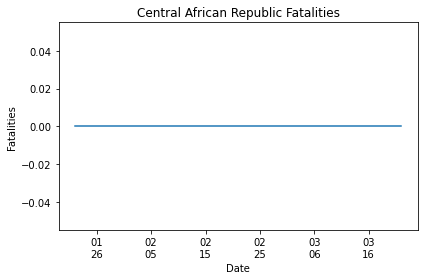

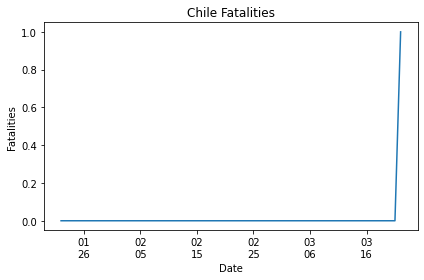

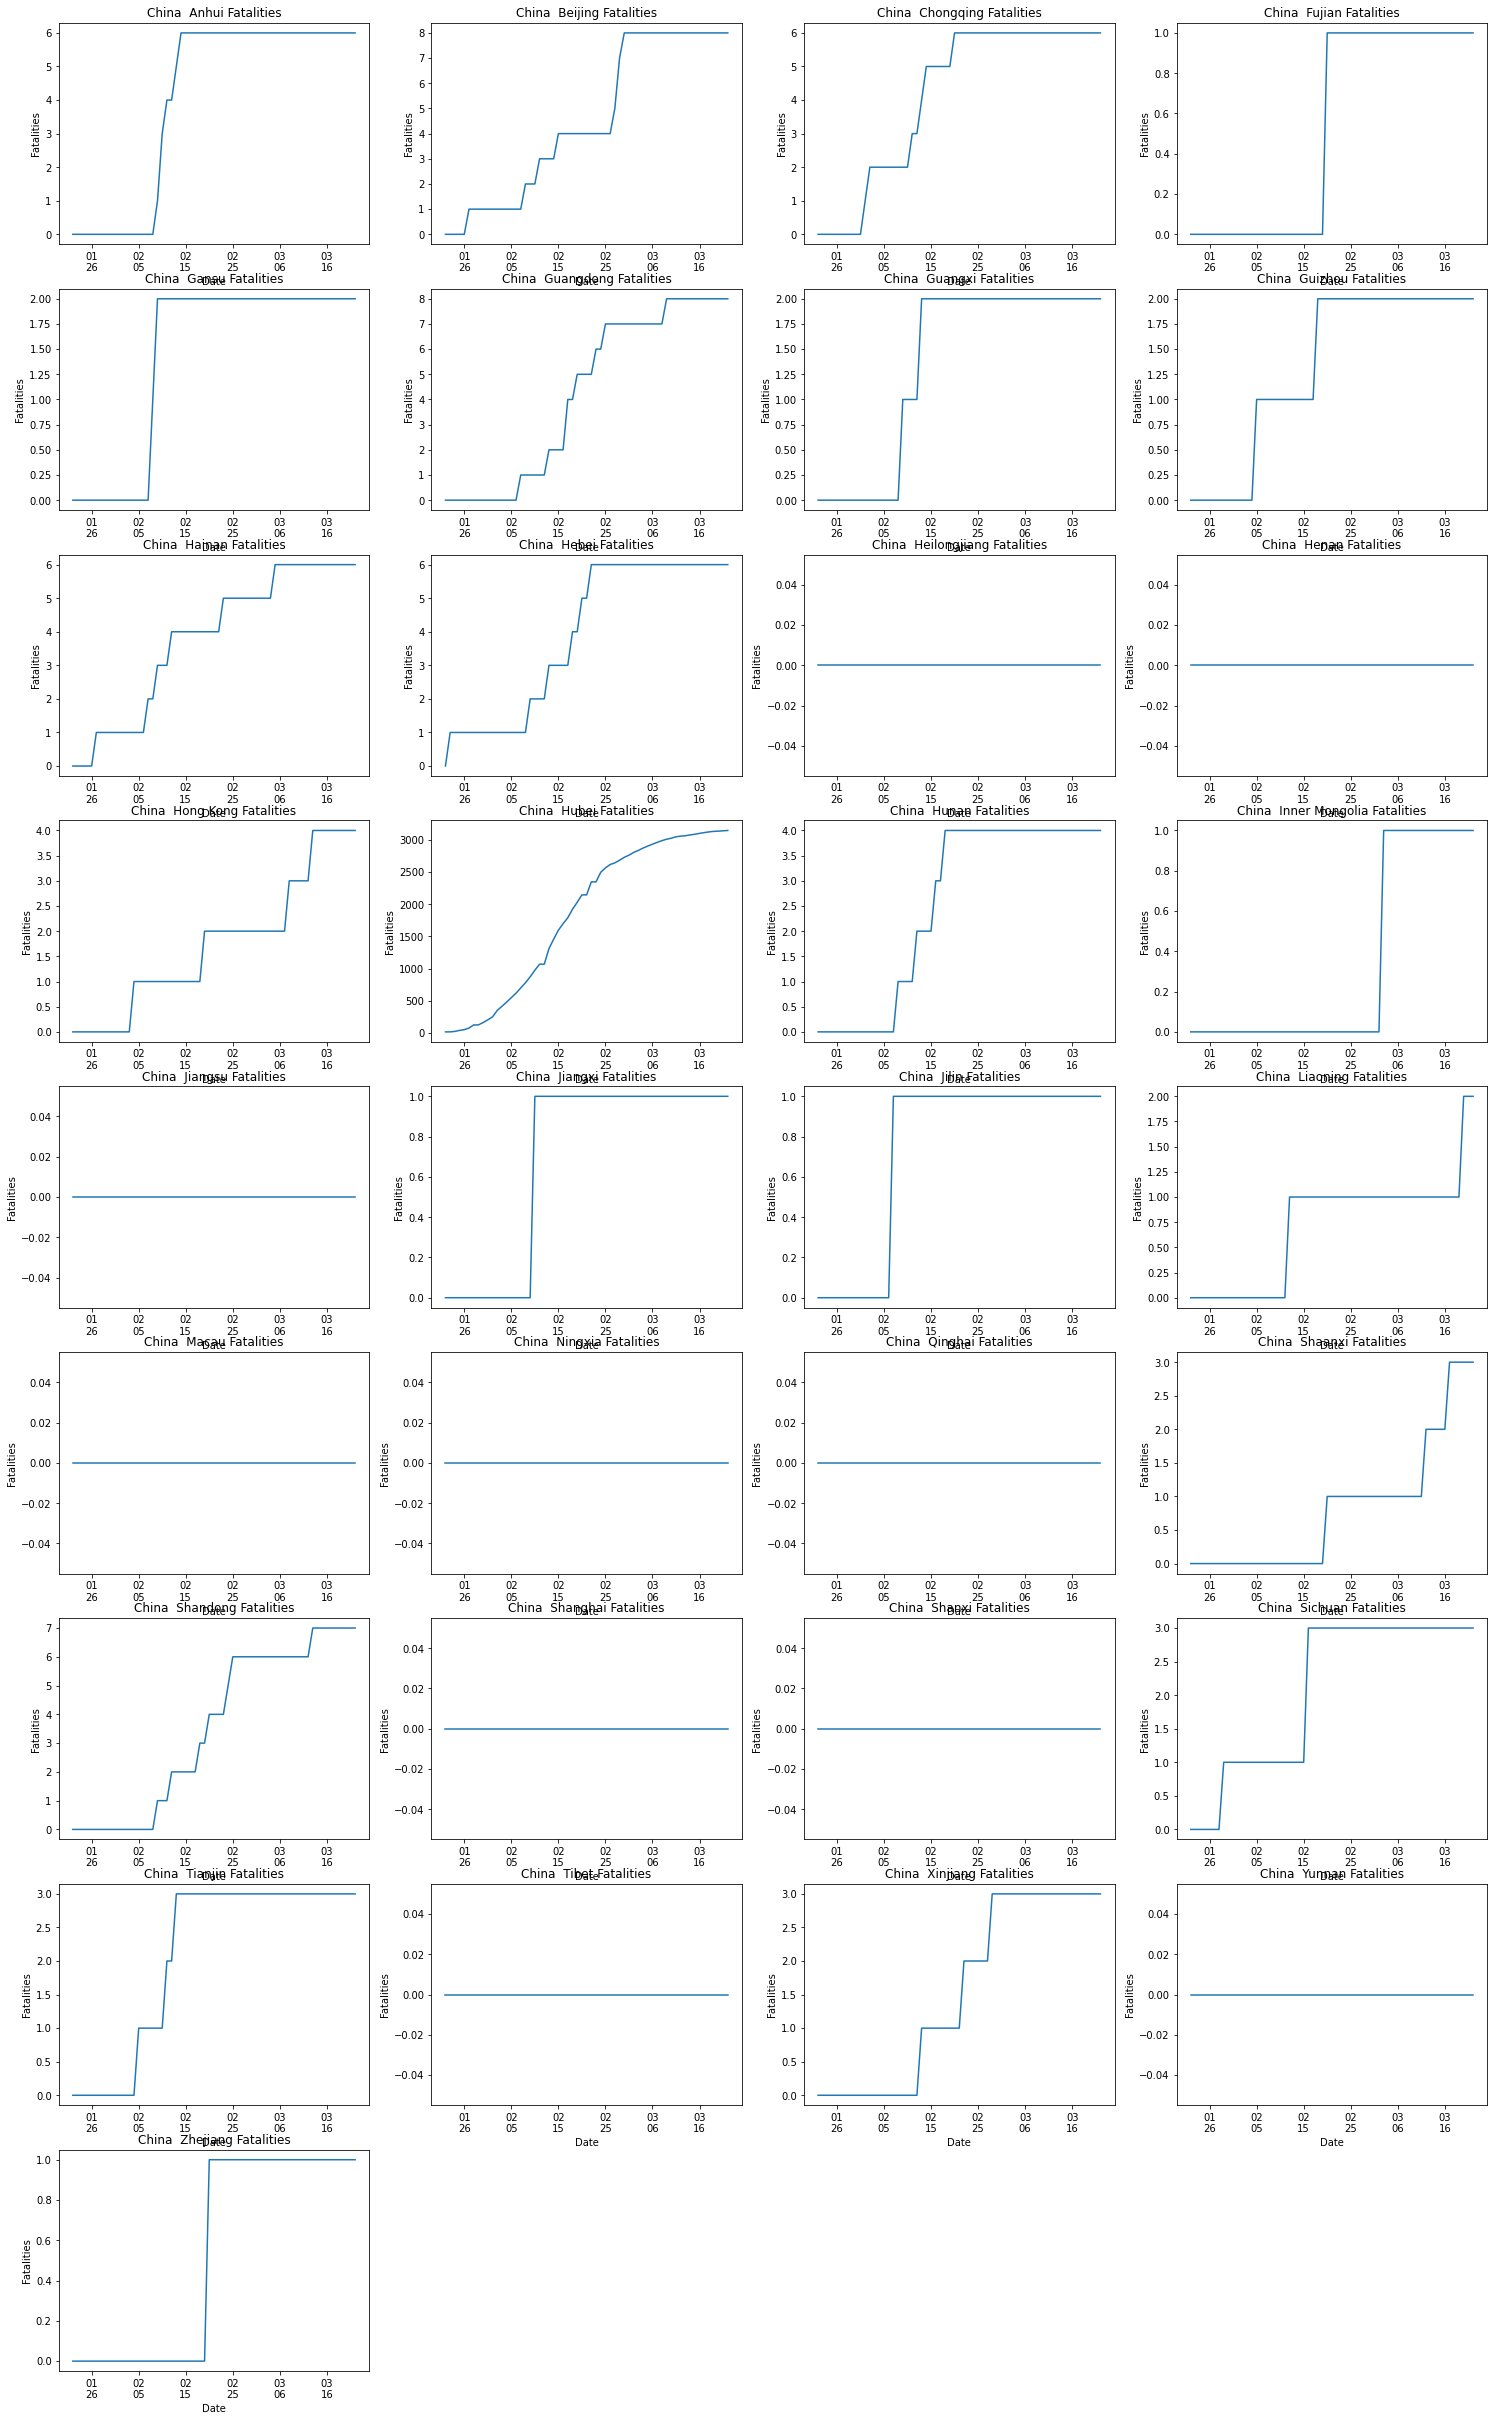

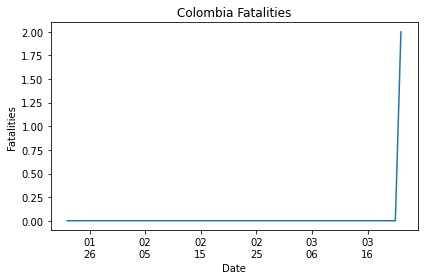

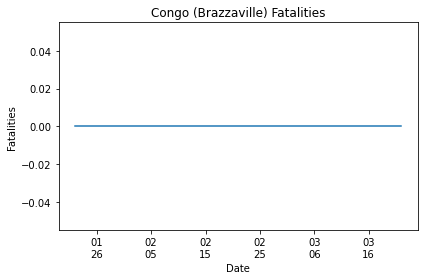

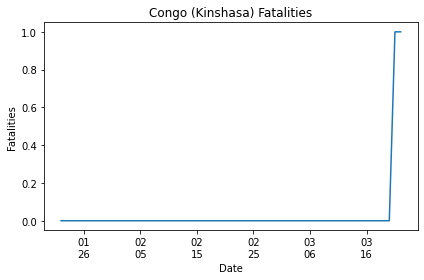

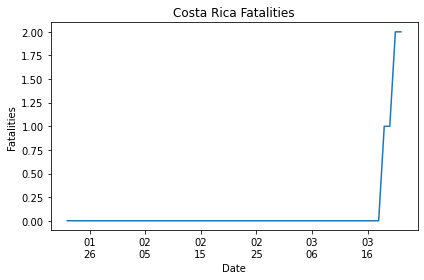

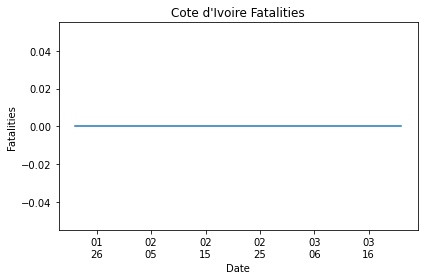

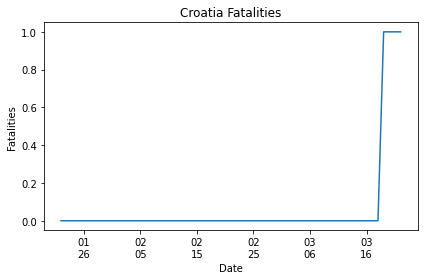

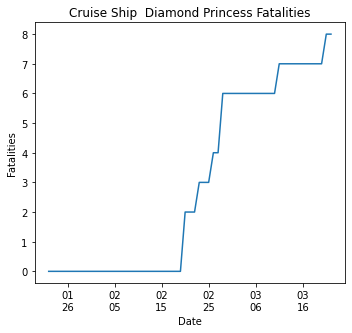

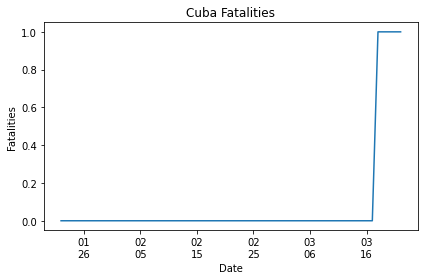

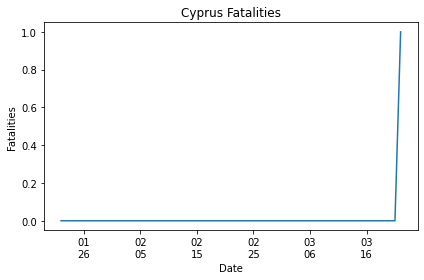

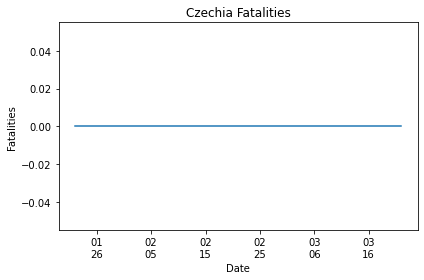

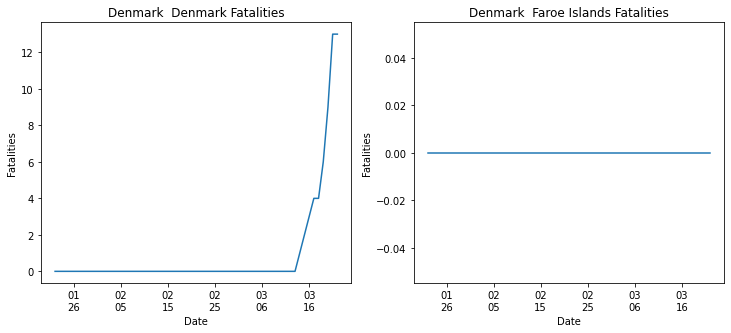

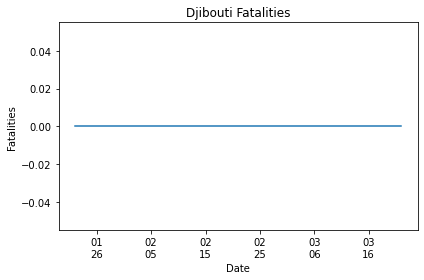

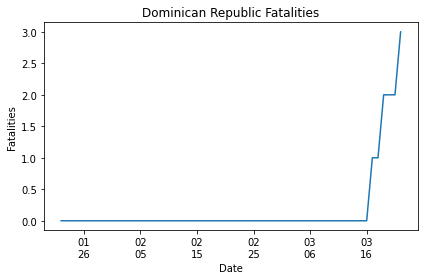

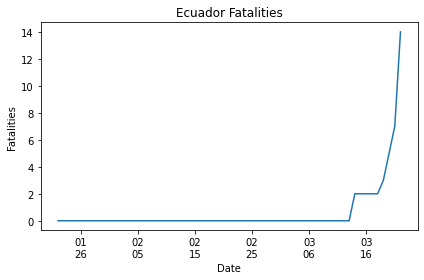

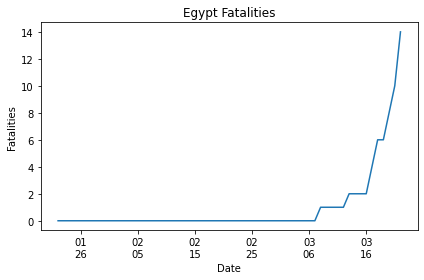

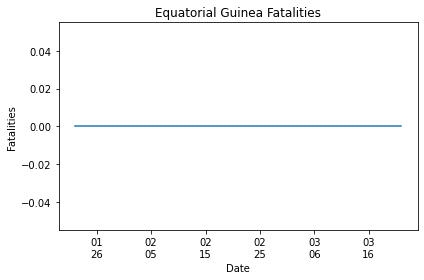

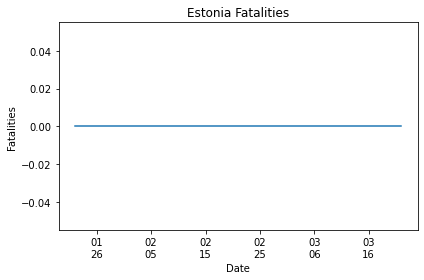

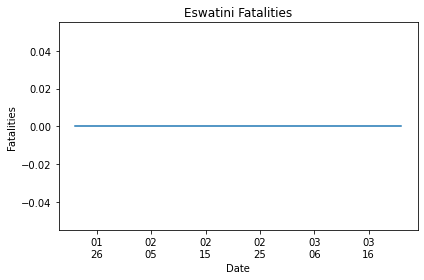

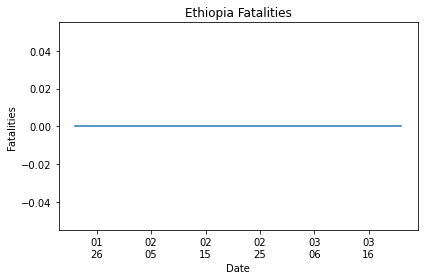

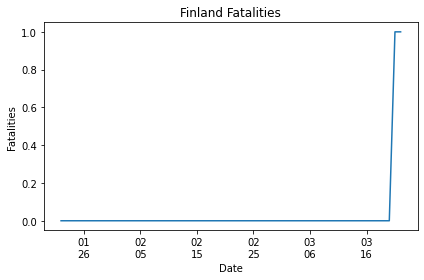

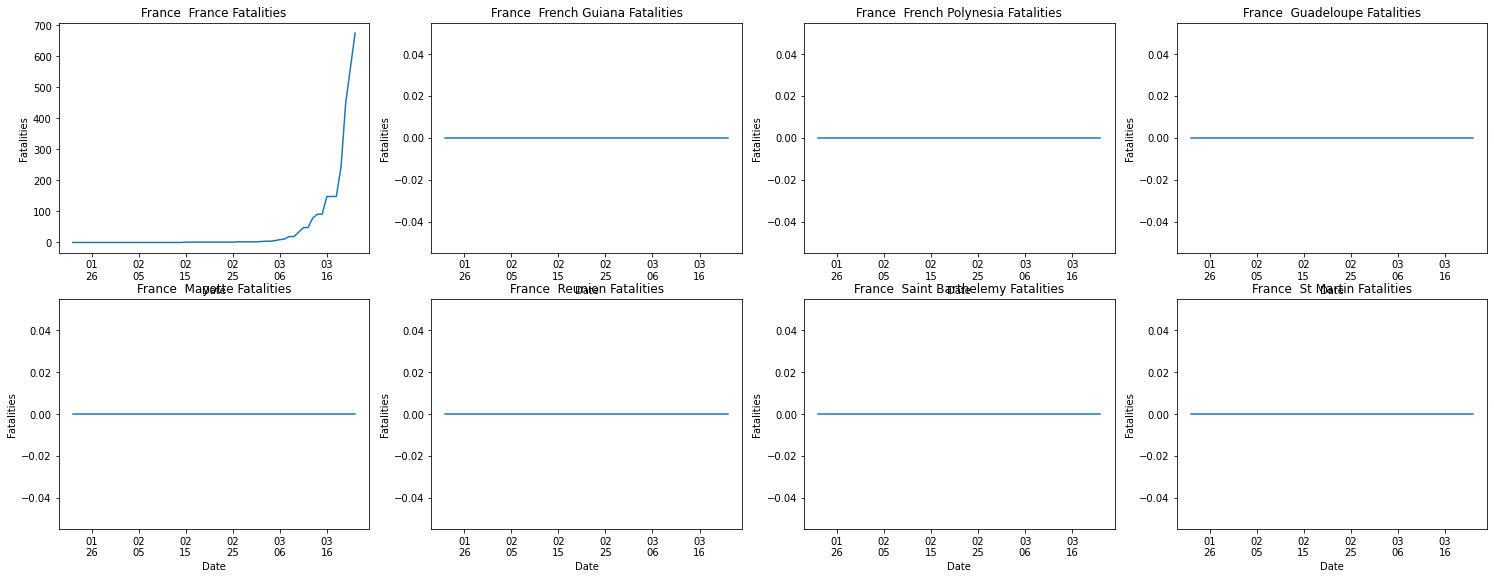

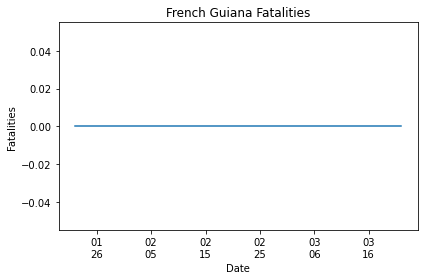

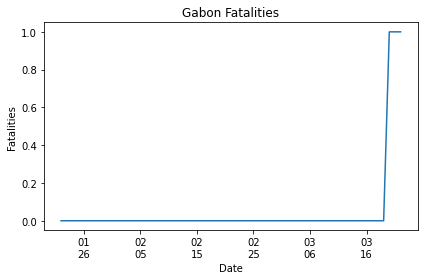

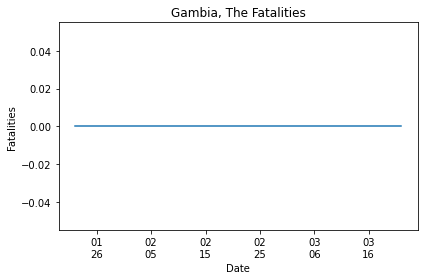

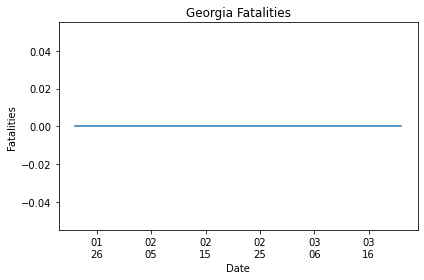

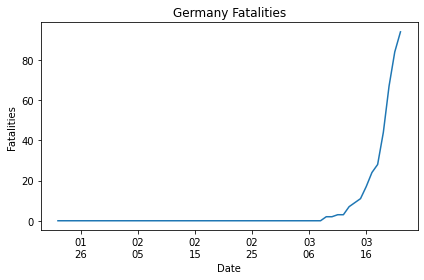

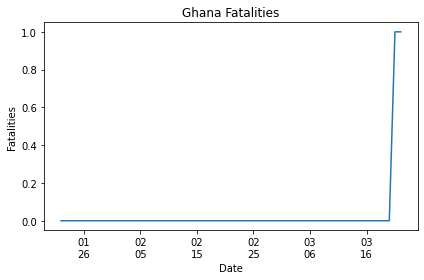

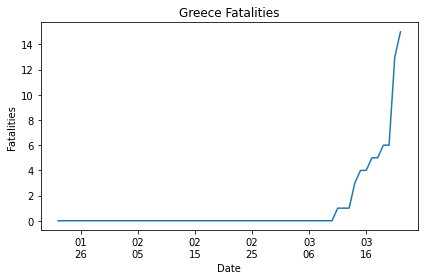

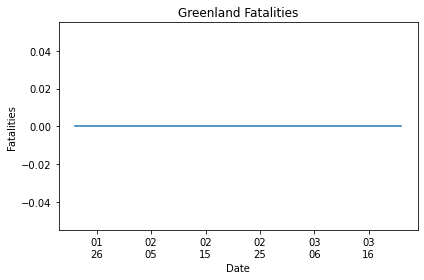

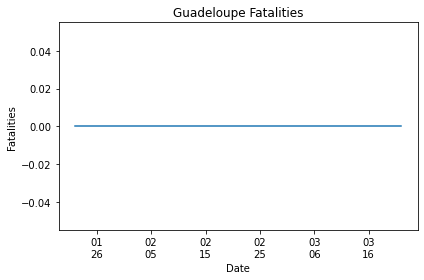

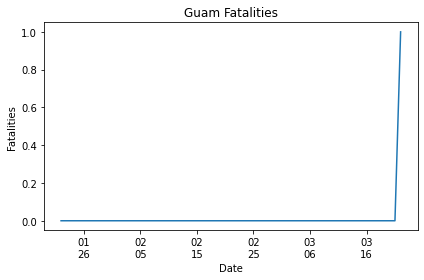

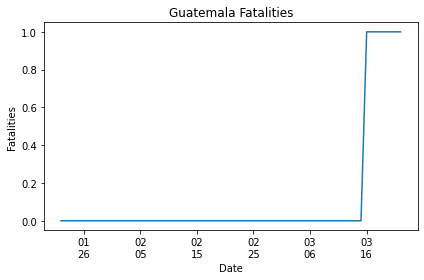

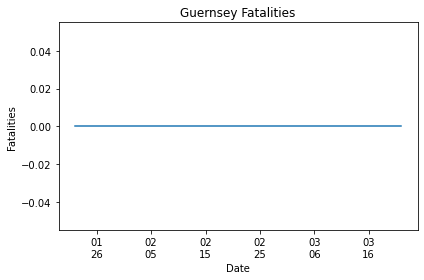

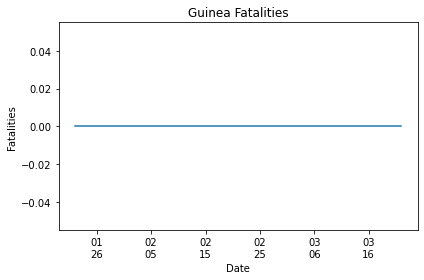

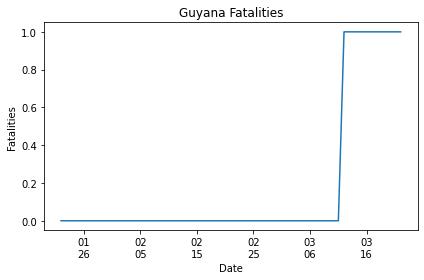

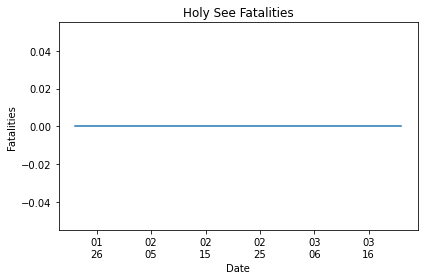

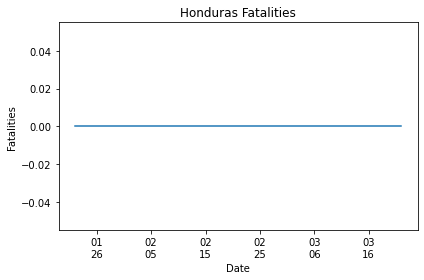

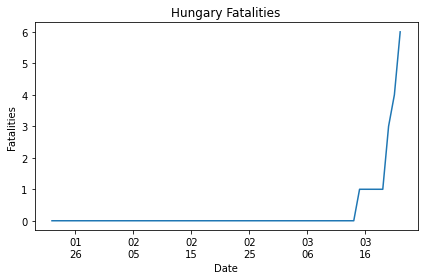

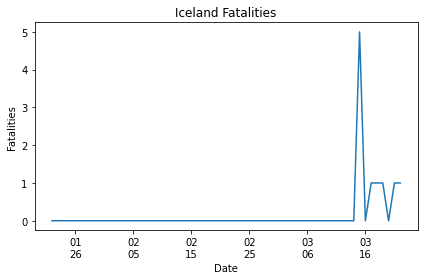

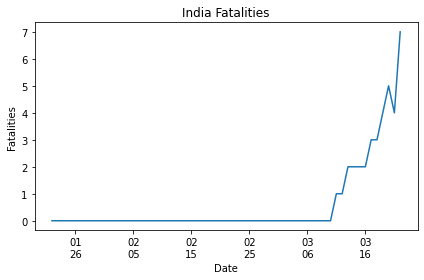

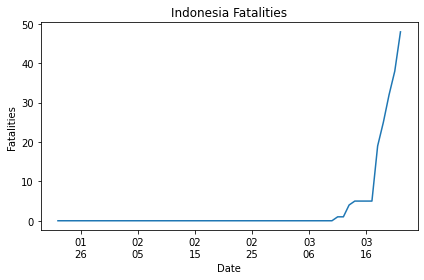

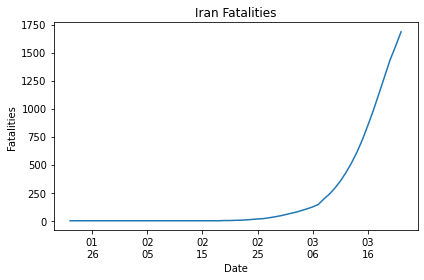

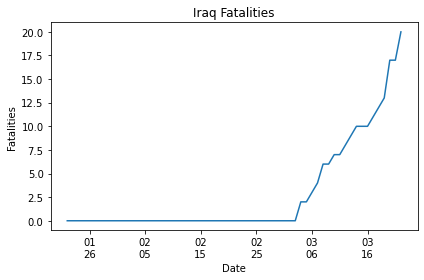

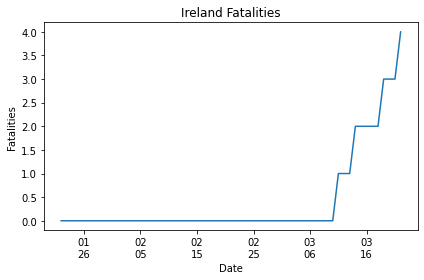

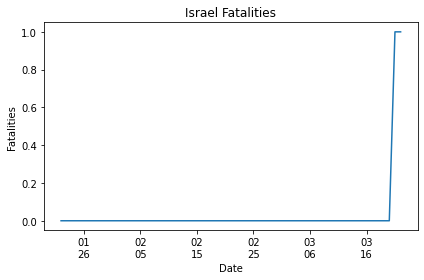

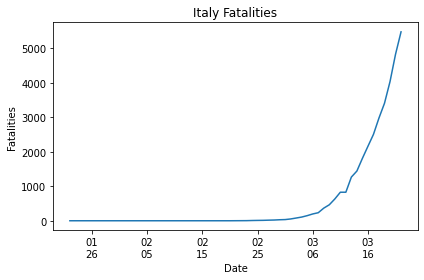

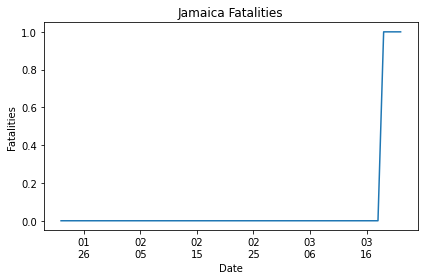

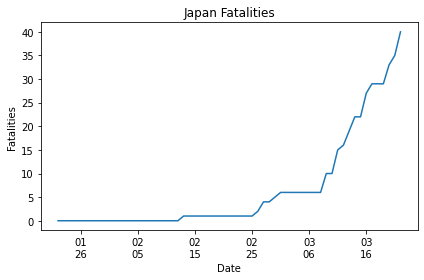

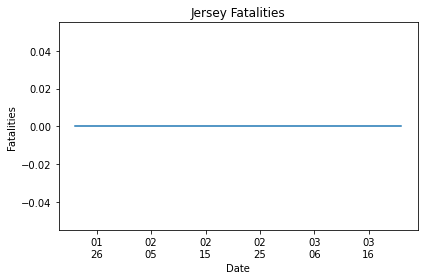

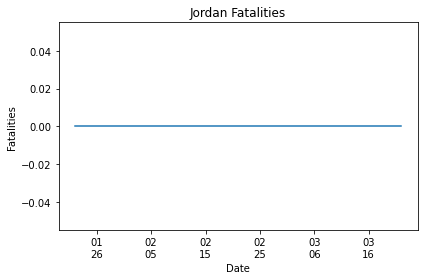

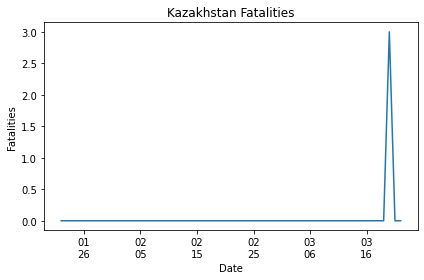

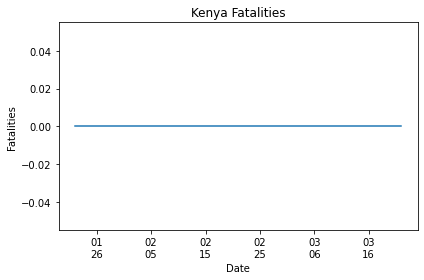

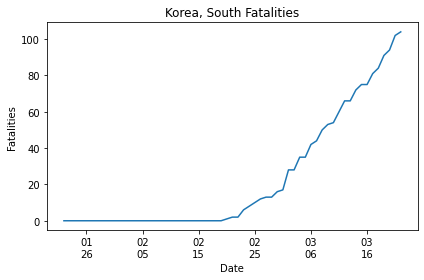

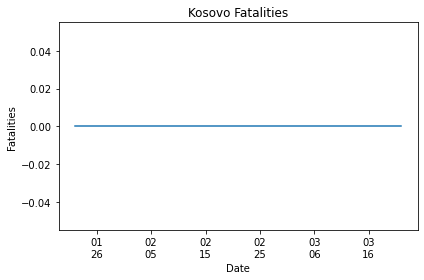

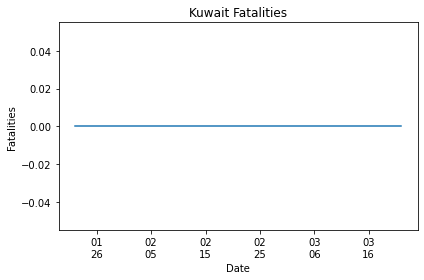

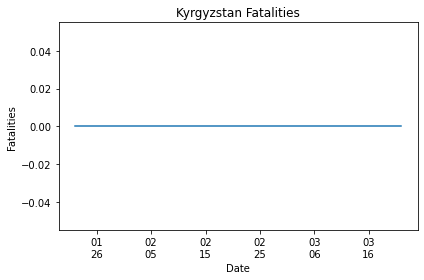

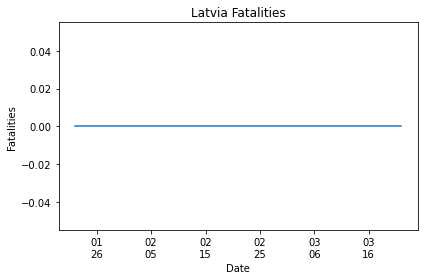

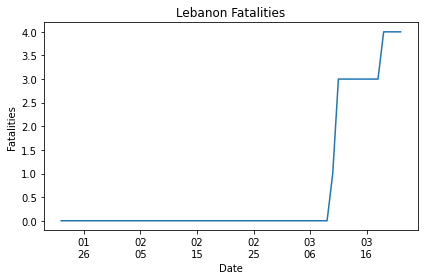

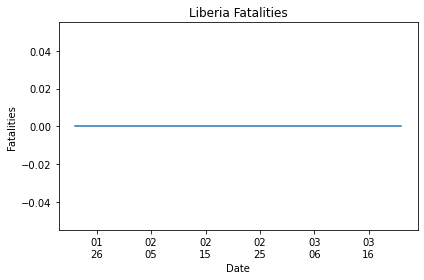

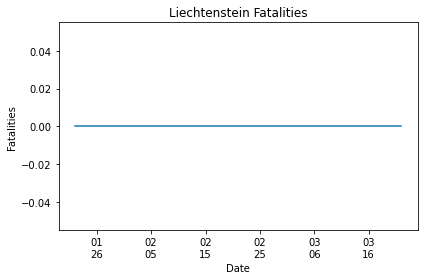

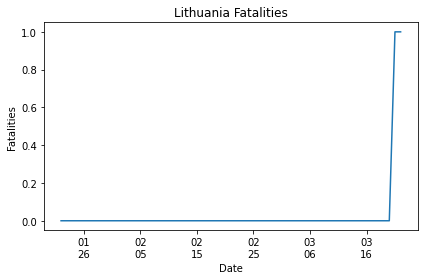

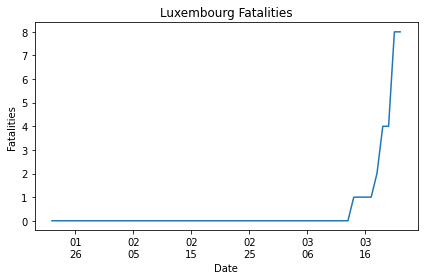

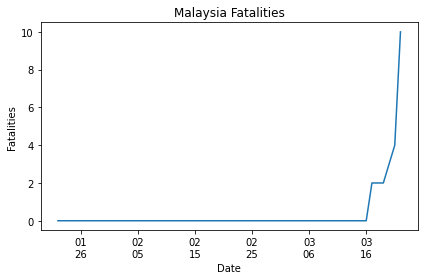

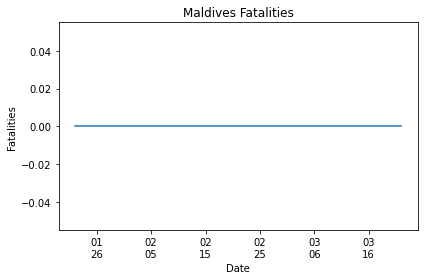

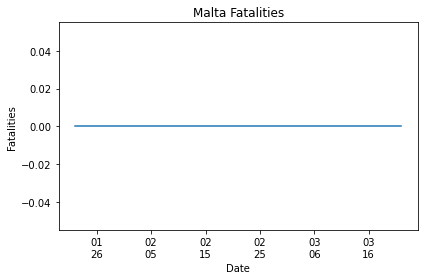

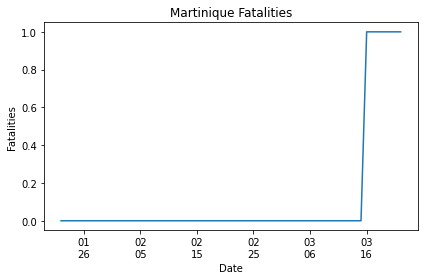

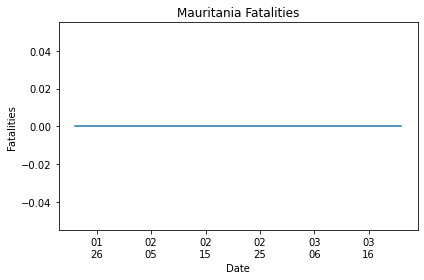

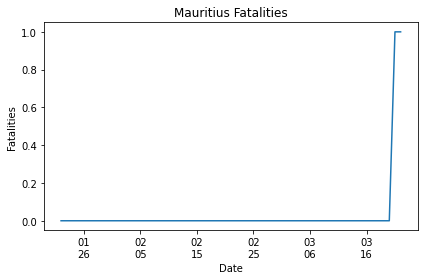

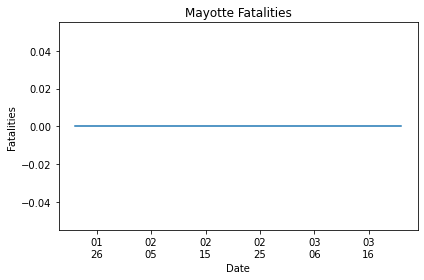

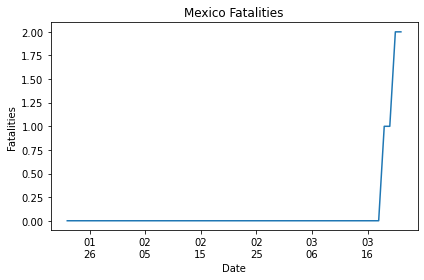

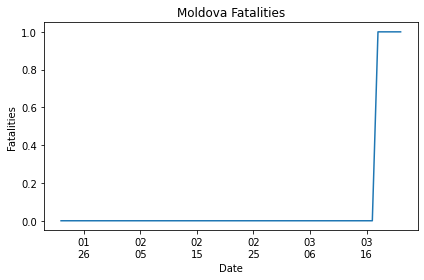

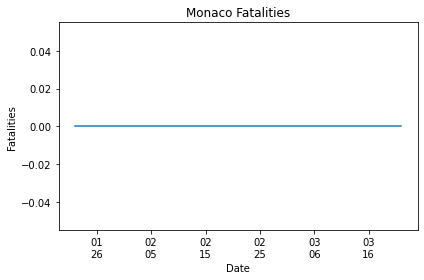

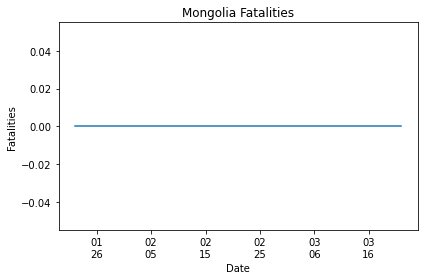

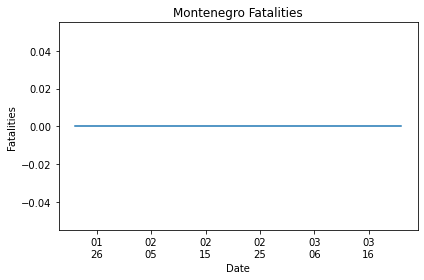

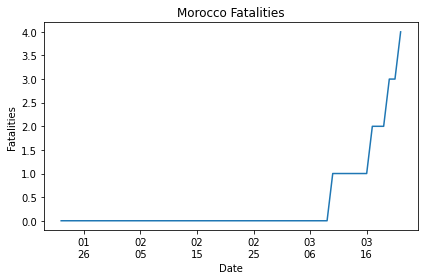

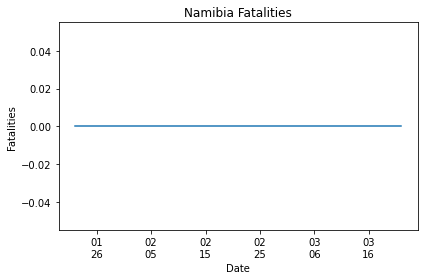

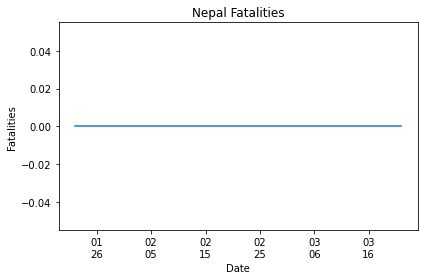

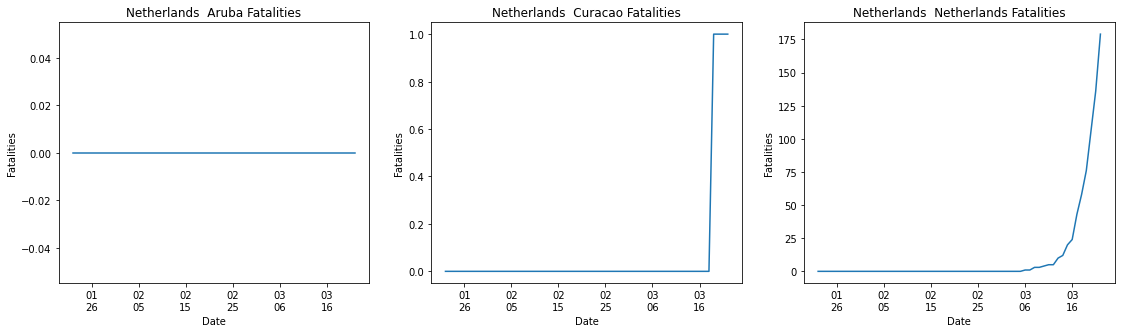

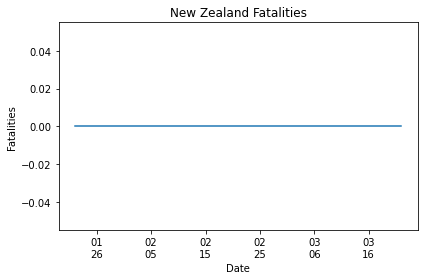

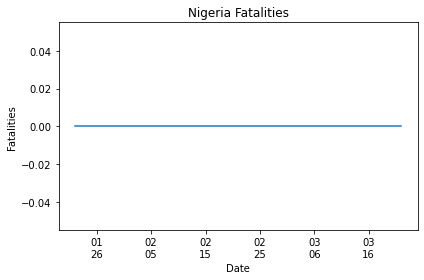

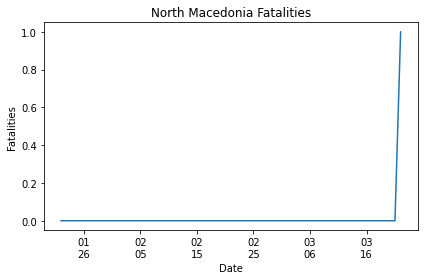

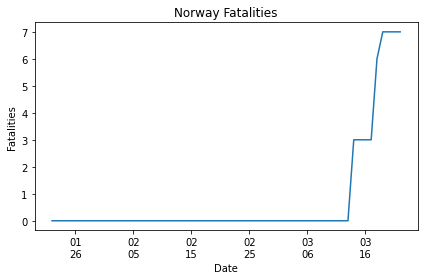

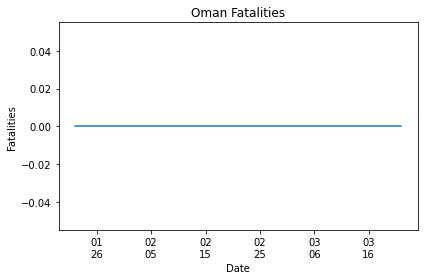

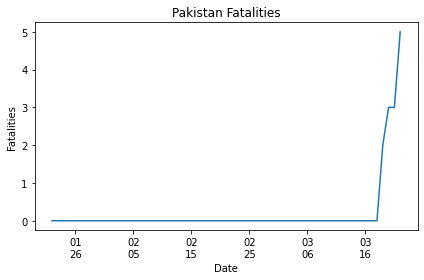

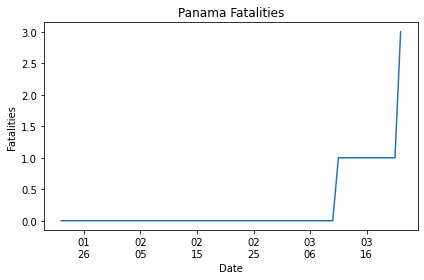

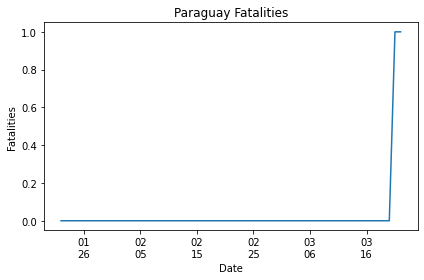

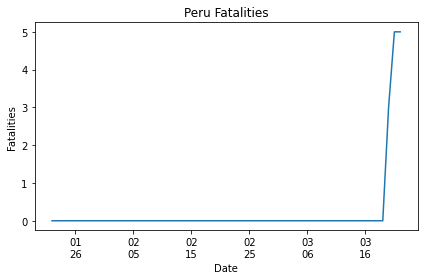

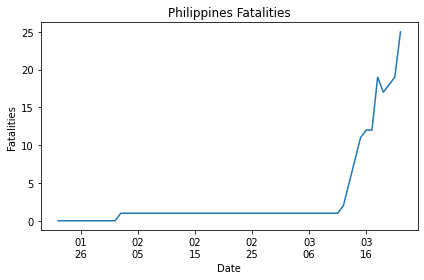

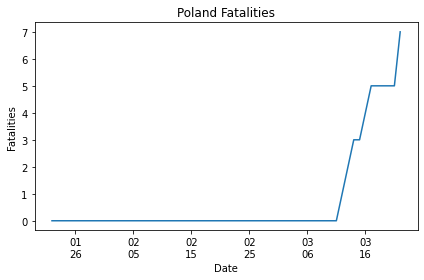

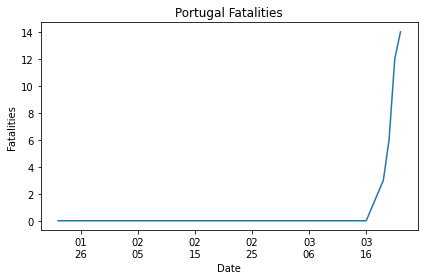

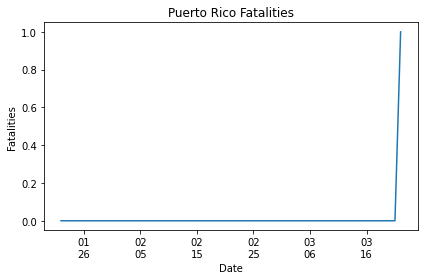

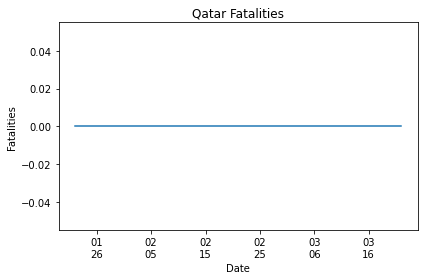

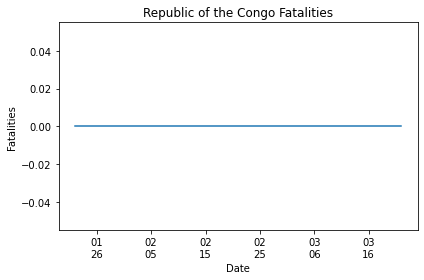

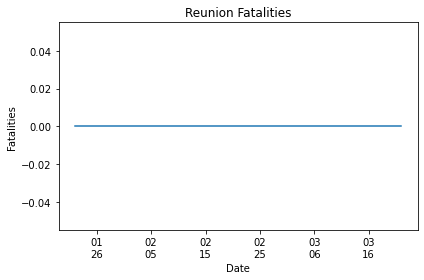

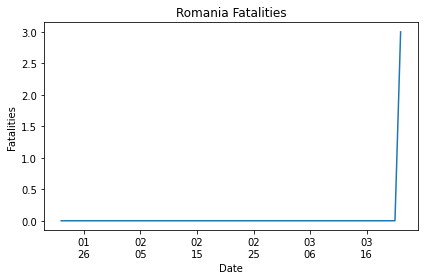

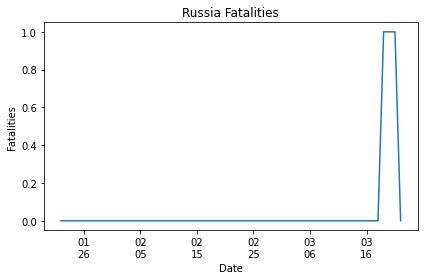

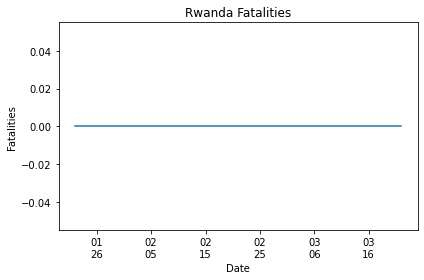

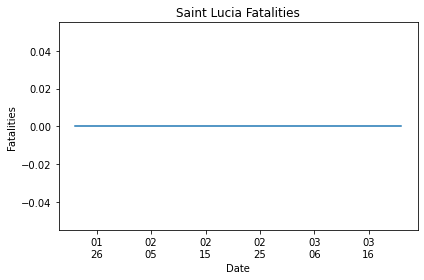

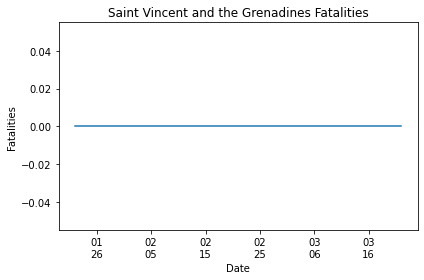

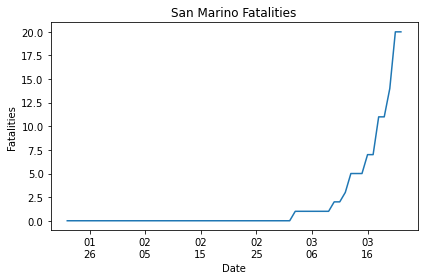

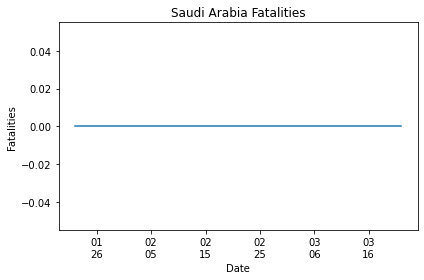

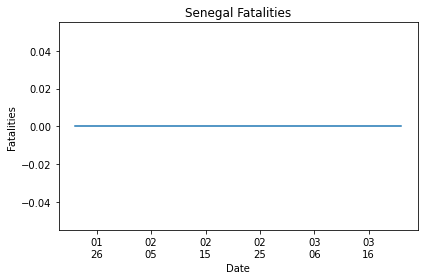

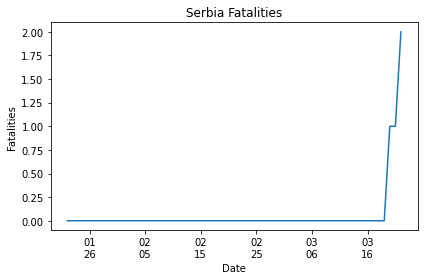

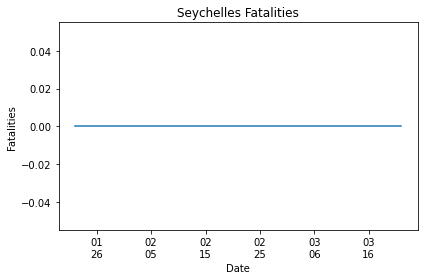

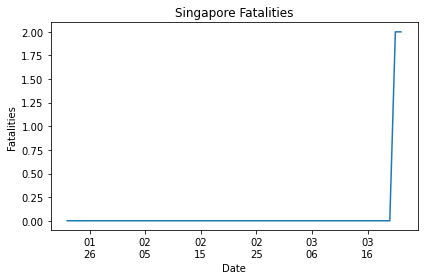

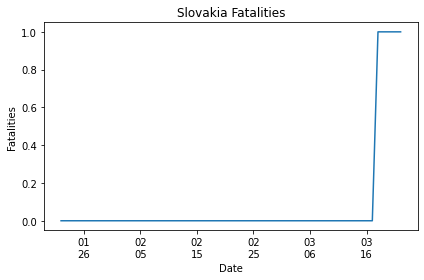

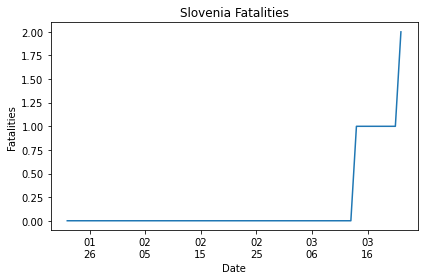

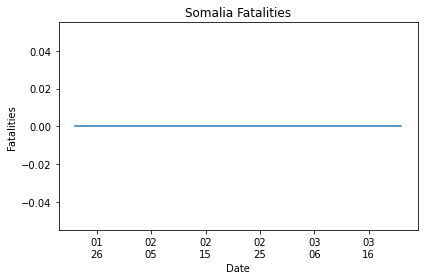

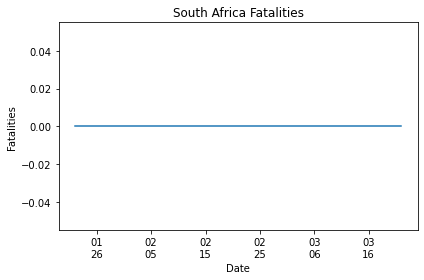

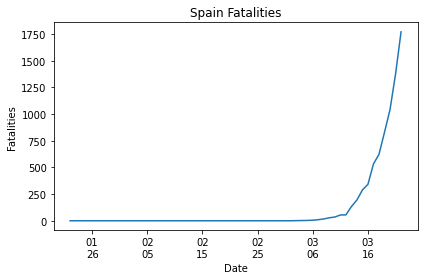

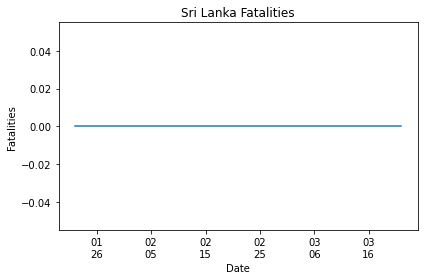

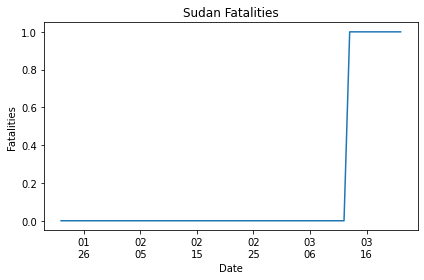

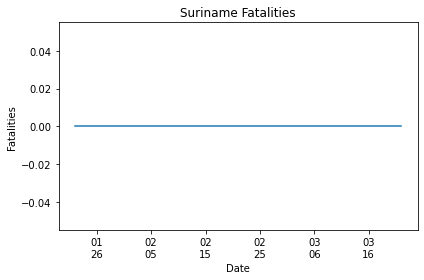

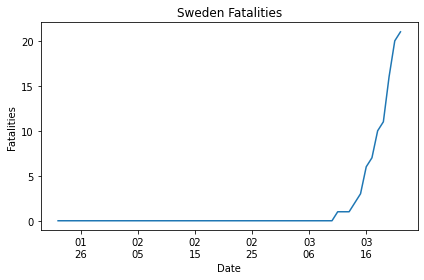

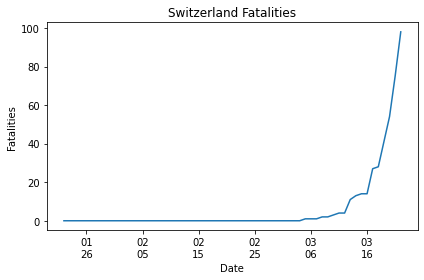

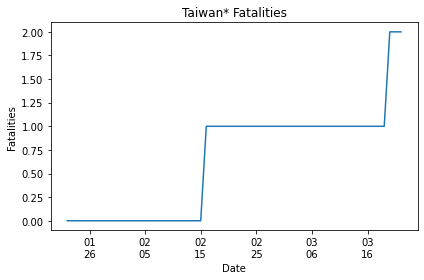

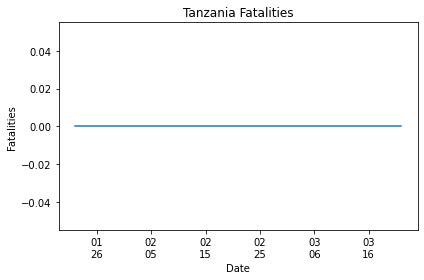

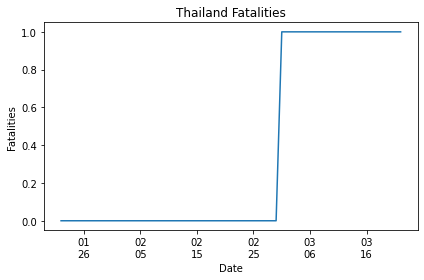

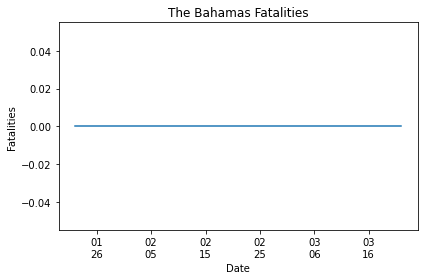

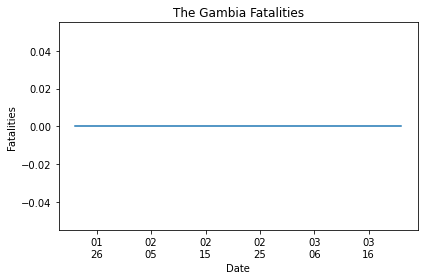

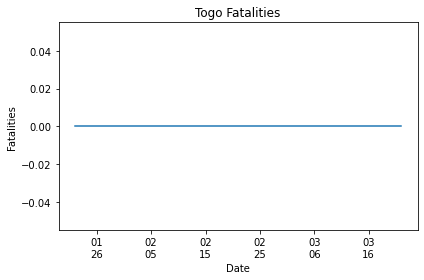

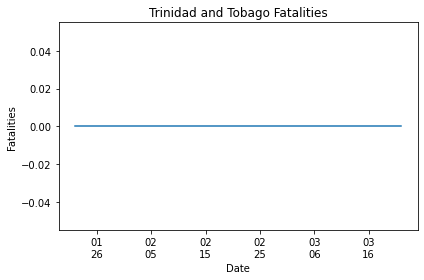

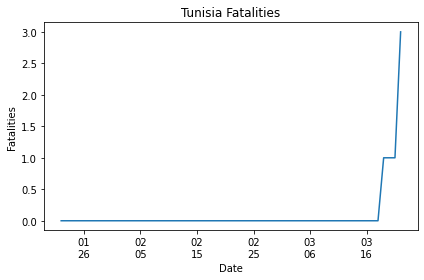

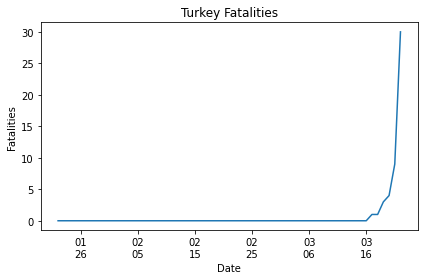

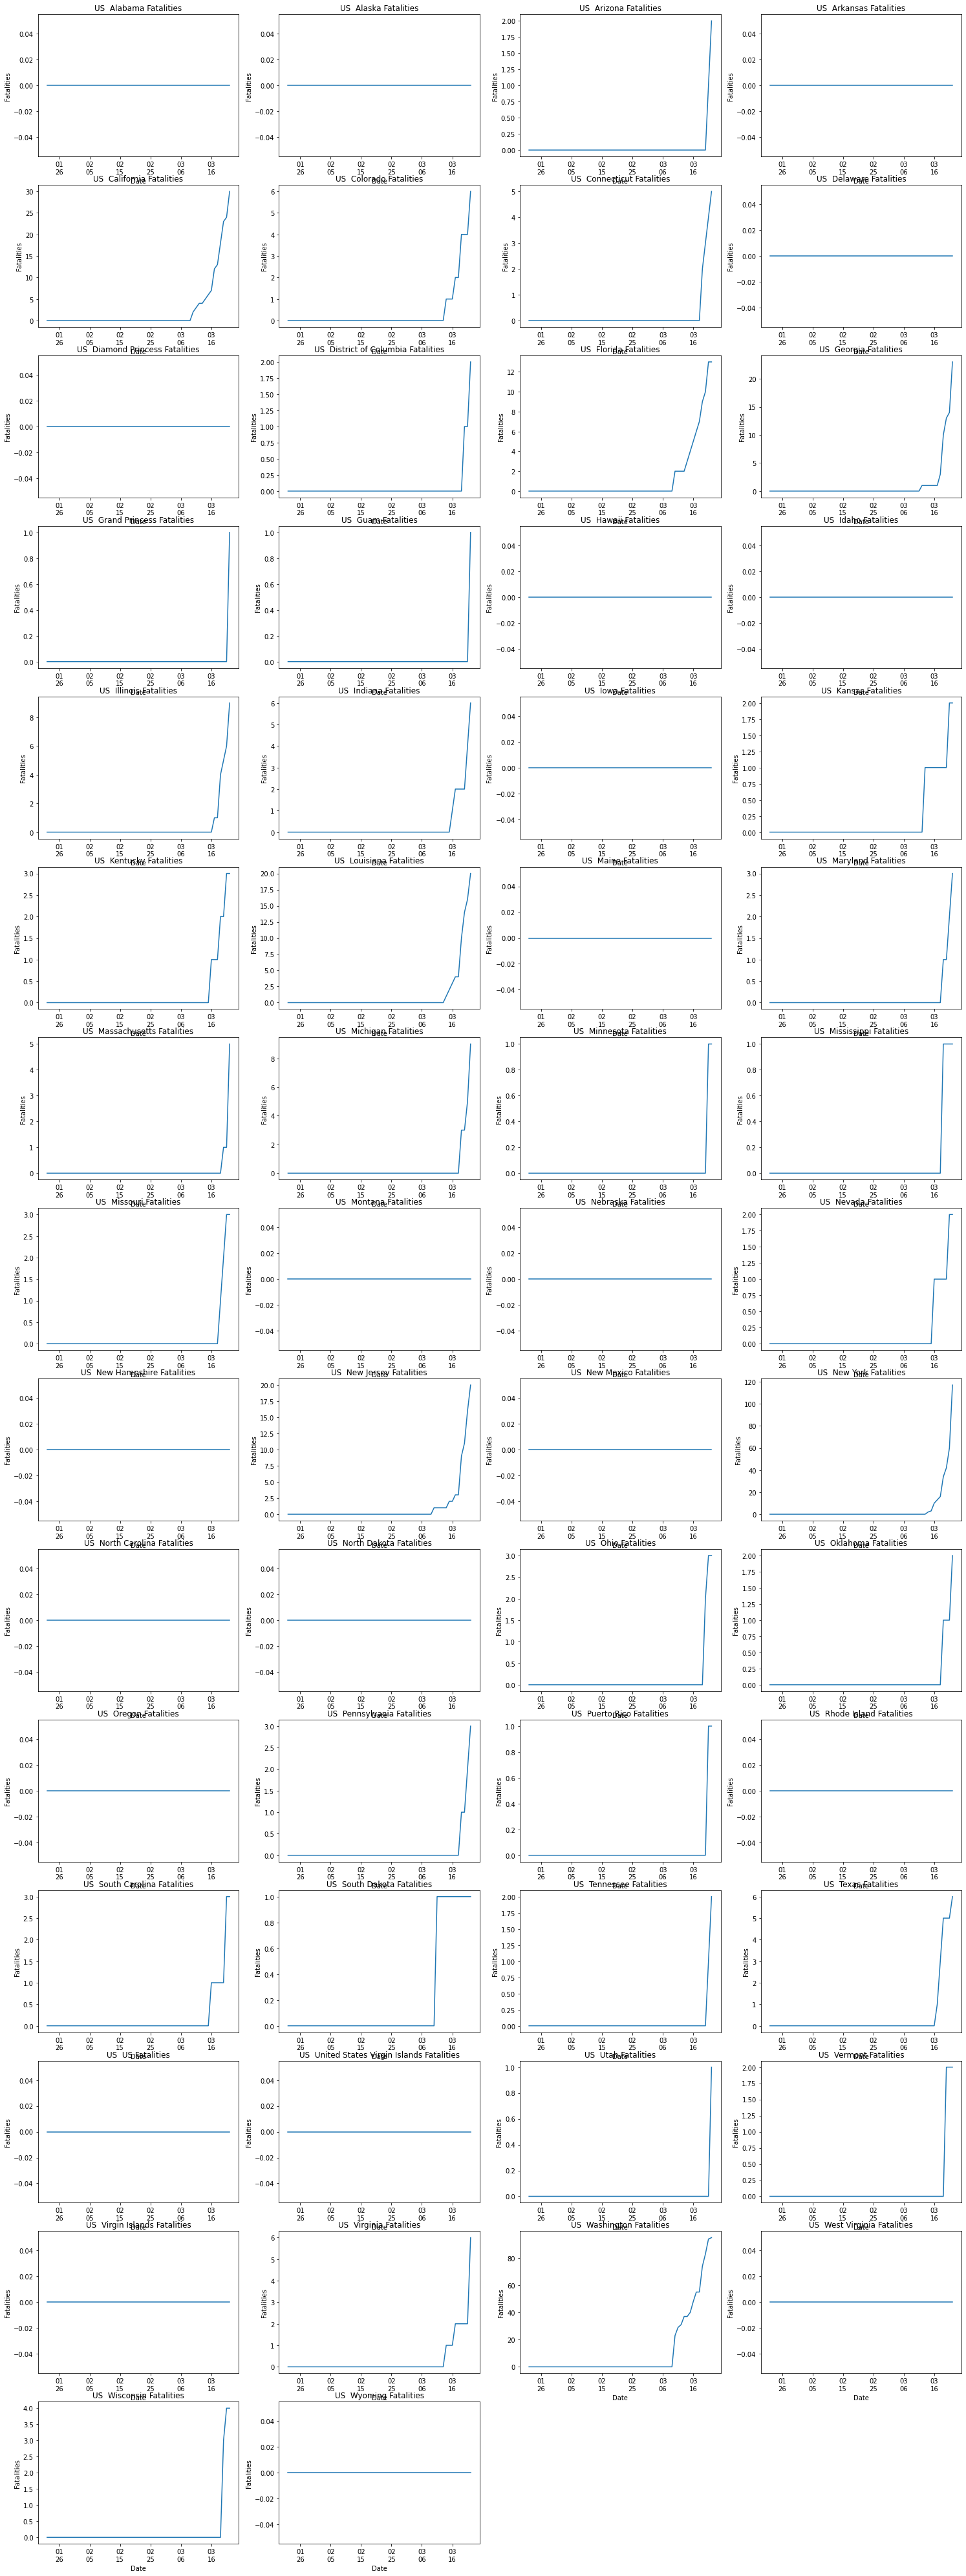

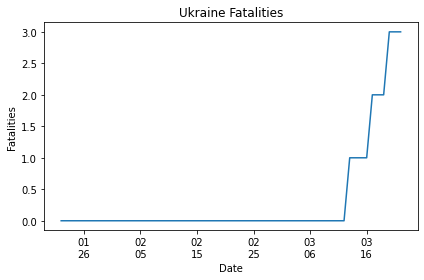

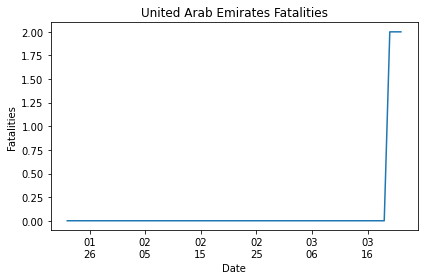

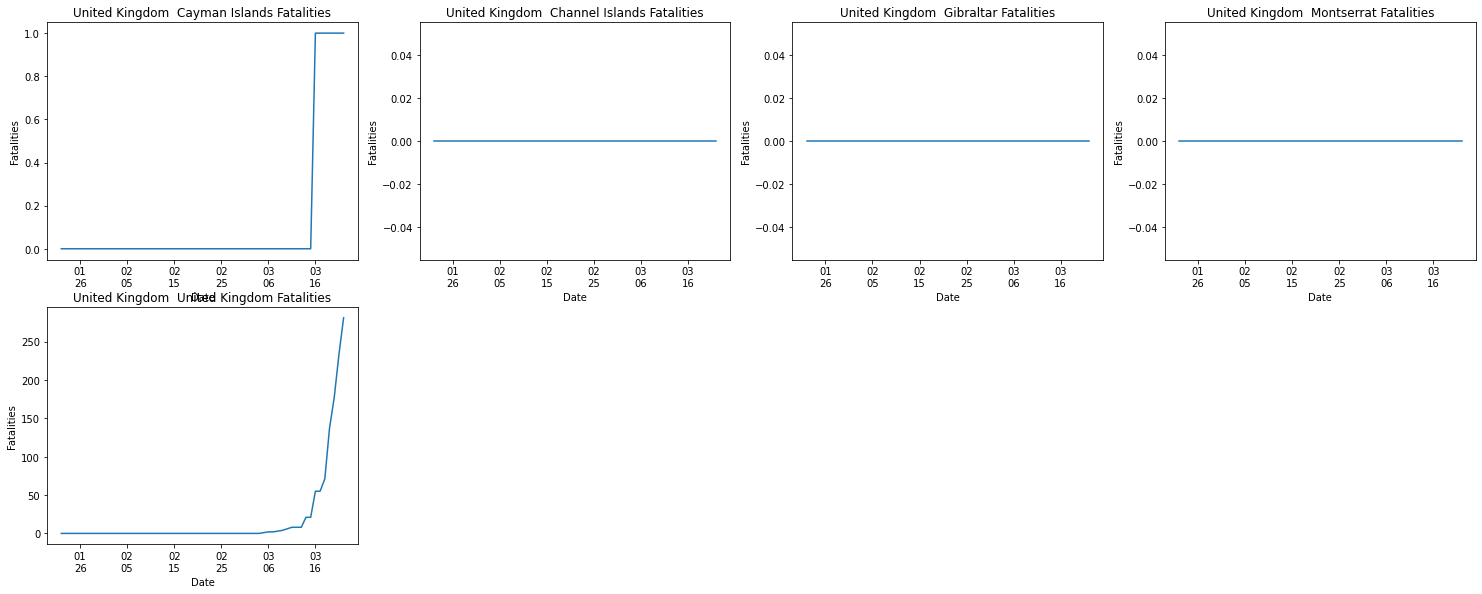

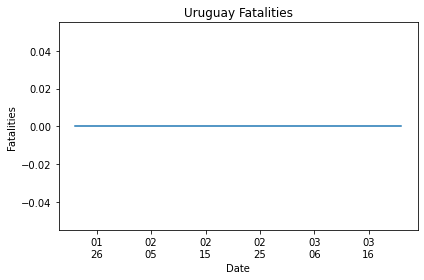

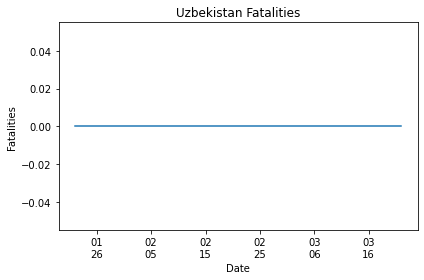

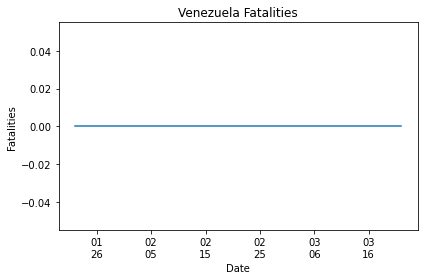

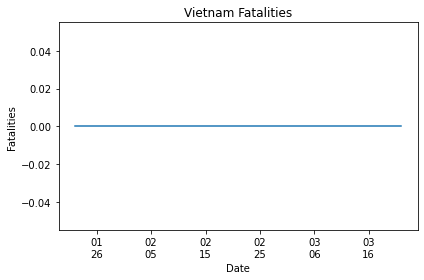

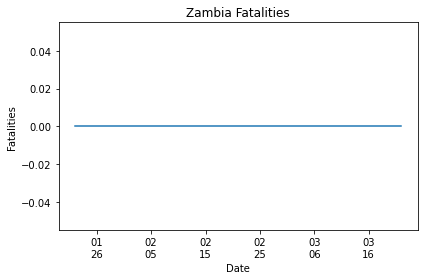

In [11]:
for country in train['Country/Region'].unique():
    country_pd_train = train[train['Country/Region']==country]
    if country_pd_train['Province/State'].isna().unique()==True:
        plt_title = country+' Fatalities'
        plot_trend_by_date(country_pd_train,value = 'Fatalities',title = plt_title)
    else:
        state_count = len(country_pd_train['Province/State'].unique())
        row = state_count//4+1
        column = 4
        fig =plt.figure(figsize = (4*6.4,row*4.8))
        index = 1
        for state in country_pd_train['Province/State'].unique():
            state_pd = country_pd_train[country_pd_train['Province/State']==state]
            plt_title = country+'  '+state+' Fatalities'
            ax = fig.add_subplot(row,column,index)
            xaxis = state_pd['Date_datetime'].tolist()
            yaxis = state_pd['Fatalities']
            xaxis = dates.date2num(xaxis)
            hfmt = dates.DateFormatter('%m\n%d')
            ax.xaxis.set_major_formatter(hfmt)

            plt.xlabel('Date')
            plt.ylabel('Fatalities')
            plt.title(plt_title)
            ax.plot(xaxis, yaxis)
            index += 1
        plt.show() 
            #plot_trend_by_date(state_pd,value = 'ConfirmedCases',title = plt_title)

### Trained the normal linear regression model to predict
### ConfirmedCase

In [12]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

for country in train['Country/Region'].unique():
    print ('training model for country ==>'+country)
    country_pd_train = train[train['Country/Region']==country]
    country_pd_test = test[test['Country/Region']==country]
    if country_pd_train['Province/State'].isna().unique()==True:
        x = np.array(range(len(country_pd_train))).reshape((-1,1))
        y = country_pd_train['ConfirmedCases']
        model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                         ('linear', LinearRegression(fit_intercept=False))])
        model = model.fit(x, y)
        predict_x = (np.array(range(len(country_pd_test)))+50).reshape((-1,1))
        test.loc[test['Country/Region']==country,'ConfirmedCases'] = model.predict(predict_x)
    else:
        for state in country_pd_train['Province/State'].unique():
            state_pd = country_pd_train[country_pd_train['Province/State']==state] 
            state_pd_test = country_pd_test[country_pd_test['Province/State']==state] 
            x = np.array(range(len(state_pd))).reshape((-1,1))
            y = state_pd['ConfirmedCases']
            model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                         ('linear', LinearRegression(fit_intercept=False))])
            model = model.fit(x, y)
            predict_x = (np.array(range(len(state_pd_test)))+50).reshape((-1,1))
            test.loc[(test['Country/Region']==country)&(test['Province/State']==state),'ConfirmedCases'] = model.predict(predict_x)

training model for country ==>Afghanistan
training model for country ==>Albania
training model for country ==>Algeria
training model for country ==>Andorra
training model for country ==>Antigua and Barbuda
training model for country ==>Argentina
training model for country ==>Armenia
training model for country ==>Aruba
training model for country ==>Australia
training model for country ==>Austria
training model for country ==>Azerbaijan
training model for country ==>Bahrain
training model for country ==>Bangladesh
training model for country ==>Barbados
training model for country ==>Belarus
training model for country ==>Belgium
training model for country ==>Benin
training model for country ==>Bhutan
training model for country ==>Bolivia
training model for country ==>Bosnia and Herzegovina
training model for country ==>Brazil
training model for country ==>Brunei
training model for country ==>Bulgaria
training model for country ==>Burkina Faso
training model for country ==>Cambodia
training

### Trained the normal linear regression model to predict
### Fatalities

In [13]:
for country in train['Country/Region'].unique():
    print ('training model for country ==>'+country)
    country_pd_train = train[train['Country/Region']==country]
    country_pd_test = test[test['Country/Region']==country]
    if country_pd_train['Province/State'].isna().unique()==True:
        x = np.array(range(len(country_pd_train))).reshape((-1,1))
        y = country_pd_train['Fatalities']
        model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                         ('linear', LinearRegression(fit_intercept=False))])
        model = model.fit(x, y)
        predict_x = (np.array(range(len(country_pd_test)))+50).reshape((-1,1))
        test.loc[test['Country/Region']==country,'Fatalities'] = model.predict(predict_x)
    else:
        for state in country_pd_train['Province/State'].unique():
            state_pd = country_pd_train[country_pd_train['Province/State']==state] 
            state_pd_test = country_pd_test[country_pd_test['Province/State']==state] 
            x = np.array(range(len(state_pd))).reshape((-1,1))
            y = state_pd['Fatalities']
            model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                         ('linear', LinearRegression(fit_intercept=False))])
            model = model.fit(x, y)
            predict_x = (np.array(range(len(state_pd_test)))+50).reshape((-1,1))
            test.loc[(test['Country/Region']==country)&(test['Province/State']==state),'Fatalities'] = model.predict(predict_x)

training model for country ==>Afghanistan
training model for country ==>Albania
training model for country ==>Algeria
training model for country ==>Andorra
training model for country ==>Antigua and Barbuda
training model for country ==>Argentina
training model for country ==>Armenia
training model for country ==>Aruba
training model for country ==>Australia
training model for country ==>Austria
training model for country ==>Azerbaijan
training model for country ==>Bahrain
training model for country ==>Bangladesh
training model for country ==>Barbados
training model for country ==>Belarus
training model for country ==>Belgium
training model for country ==>Benin
training model for country ==>Bhutan
training model for country ==>Bolivia
training model for country ==>Bosnia and Herzegovina
training model for country ==>Brazil
training model for country ==>Brunei
training model for country ==>Bulgaria
training model for country ==>Burkina Faso
training model for country ==>Cambodia
training